# CLASE 2.2: Una introducción a la API de <font color='mediumorchid'>Scikit-Learn</font>.
---

## Introducción.
En lo que resta de estos apuntes (o, al menos, en su gran mayoría), nos dedicaremos a implementar distintos algoritmos de machine learning en Python haciendo uso de la librería **<font color='mediumorchid'>Scikit-Learn</font>**, y que corresponde a uno de los recursos más utilizados en el mundo para la construcción de soluciones a infinidad de problemas por medio de modelos basados en este tipo de algoritmos.

**<font color='mediumorchid'>Scikit-Learn</font>** es una librería de Python construida sobre tres librerías esenciales que ya hemos estudiado previamente en el repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main): **<font color='mediumorchid'>Numpy</font>**, **<font color='mediumorchid'>Scipy</font>** y **<font color='mediumorchid'>Matplotlib</font>**. El objetivo de **<font color='mediumorchid'>Scikit-Learn</font>** es proveer a los desarrolladores de herramientas sencillas y eficientes para el análisis de datos a nivel predictivo (*classic machine learning*), y cualquier aspirante a profesional de la ciencia de datos debería disponer de esta librería en su *caja de herramientas*. Es por eso que haremos lo posible por describir sus funcionalidades en el campo del aprendizaje supervisado, no supervisado, pre-procesamiento de datos y la selección de modelos.

La librería **<font color='mediumorchid'>Scikit-Learn</font>** se caracteriza por su API limpia, uniforme y con una enorme calidad en su código y mantenimiento, contando además con una [documentación](https://scikit-learn.org/stable/index.html) que cubre de sobremanera cualquier duda que tengamos en relación a la implementación de cualquiera de sus módulos, funciones o clases. Esta API ha sido desarrollada con una filosofía de flexibilidad y escalabilidad en todo nivel, de manera tal que, una vez aprendida la sintaxis de ajuste y predicción de un tipo de modelo, el cambio a otro es relativamente directo, con exactamente los mismos atributos, variando solamente los argumentos propios (`**kwargs`) de cada uno.

**<font color='mediumorchid'>Scikit-Learn</font>** puede instalarse en nuestro computador con Windows fácilmente usando el índice de paquetes de Python mediante la siguiente instrucción en una terminal (Powershell, CMD, o cualquiera de nuestra preferencia):

    pip install -U scikit-learn

Partiremos pues importando las librerías que utilizaremos en esta sección. Notemos que no haremos aún una importación de **<font color='mediumorchid'>Scikit-Learn</font>**, puesto que para su uso será más común que consideremos sus diversos **módulos** por separado. Esto es algo que veremos en detalle más adelante:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Un setting previo para hermosear nuestras figuras.
plt.rcParams["figure.dpi"] = 100
sns.set()
plt.style.use("bmh")

In [3]:
%matplotlib notebook

## Representación de la data en <font color='mediumorchid'>Scikit-Learn</font>.
Partiremos cubriendo la representación de la data en **<font color='mediumorchid'>Scikit-Learn</font>**, seguido de la API estimadora de esta librería. Para ejemplificar los conceptos que aprenderemos y su correspondiente implementación, haremos uso de algunos *toysets* masivamente utilizados en muchísimos cursos en línea, ya que serán más que suficientes para la ejemplificación de los mismos.

### Data con formato de tabla.
Una tabla básica corresponde a una grilla bidimensional conformada por datos en cada uno de sus registros. Las filas representan los elementos individuales de un conjunto de datos, y las columnas representan las cualidades o atributos que caracterizan al conjunto de datos. Por ejemplo, consideremos el *toyset* **<font color='forestgreen'>IRIS</font>**, que ya habíamos descrito previamente, y que consta de un total de 150 muestras de características relativas a flores de la especie Iris, con un subconjunto de muestras perteneciente a cada subespecie Iris Setosa, Iris Versicolor o Iris Virginica. Este conjunto de datos puede encontrarse en una gran cantidad de librerías de Python dedicadas al análisis de datos, y por supuesto **<font color='mediumorchid'>Scikit-Learn</font>** no es la excepción. Esta librería, de hecho, cuenta con un módulo dedicado a la descarga de diversos *toysets* denominado `sklearn.datasets` (en Python, la librería **<font color='mediumorchid'>Scikit-Learn</font>** suele tener como *namespace* a `sklearn`, y no `scikit-learn`, como cabría esperar), el que cuenta varias funciones para cada *toyset* de interés. En el caso del conjunto de datos **<font color='forestgreen'>IRIS</font>**, éste puede cargarse rápidamente haciendo uso de la función `load_iris()` como sigue:

In [4]:
from sklearn.datasets import load_iris

In [5]:
# Carga del dataset IRIS.
iris_dataset = load_iris(as_frame=True)

En el código anterior, hemos hecho uso del argumento booleano `as_frame` para retornar las *componentes* del dataset en un formato de DataFrame de **<font color='mediumorchid'>Pandas</font>**. Los objetos retornados por las funciones de carga de datasets en **<font color='mediumorchid'>Scikit-Learn</font>** suelen ser diccionarios que cuentan con las siguientes llaves:

- `data`: Los atributos que componen el dataset. Recordemos que, con *atributos*, nos referimos a las variables independientes del mismo. Como hemos seteado el parámetro `as_frame=True`, tales atributos y sus valores vendrán en un formato de DataFrame de **<font color='mediumorchid'>Pandas</font>**. En caso contrario, el formato será de un arreglo bidimensional de **<font color='mediumorchid'>Numpy</font>**.
- `target`: Un arreglo unidimensional que contiene las *etiquetas* o valores objetivo de un dataset y que deseamos predecir por medio de un determinado modelo. Como hemos seteado el parámetro `as_frame=True`, tales atributos y sus valores vendrán en un formato de serie de **<font color='mediumorchid'>Pandas</font>**. En caso contrario, el formato será de un arreglo unidimensional de **<font color='mediumorchid'>Numpy</font>**.
- `DESCR`: Una descripción del dataset que hemos cargado.

La descripción siempre es útil, porque nos aclarará cualquier duda que tengamos, posiblemente, en relación al correspondiente conjunto de datos:

In [6]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

En el dataset que hemos cargado previamente, cada fila del mismo está referida a la observación de una única flor, y el número de filas corresponde al número total de flores que pueblan el dataset. En general, nos ceñiremos a las nomenclaturas *clásicas* que establecimos en la [clase 2.1](https://github.com/rquezadac/udd_data_science_lectures/blob/develop/PARTE%20II%20-%20Modelos%20de%20aprendizaje%20supervisado/clase_2_1.ipynb), y nos referiremos a las filas de esta **matriz de datos** como **registros**, **instancias** u **observaciones**. Así, el número total de observaciones lo denotaremos como `n_samples`. Igualmente, cada columna del dataset está referida a una determinada pieza de información cualitativa que describe cada observación. En general, nos referiremos a las columnas de la matriz como **variables** o **atributos**; así, el número total de columnas del dataset se denotará como `n_features`.

En la Fig. (2.1) hemos ilustrado el formato de tabla que **<font color='mediumorchid'>Scikit-Learn</font>** suele esperar cuando deseamos ajustar un determinado modelo.

<p style="text-align: center;"><img src="figures/fig_2_1.png" width="450"></p>
<p style="text-align: center;">Fig. (2.1): Un esquema general de como <font color='mediumorchid'>Scikit-Learn</font> espera que se imputen los datos en un modelo determinado</p>

### Matriz de atributos (variables independientes).
El formato de tipo tabla que hemos especificado previamente nos deja claro que la información puede ser idealizada o entendida como una matriz bidimensional de elementos numéricos, que denominamos como **matriz de atributos**. Por convención, la matriz de atributos suele almacenarse en **<font color='mediumorchid'>Scikit-Learn</font>** en una variable de nombre `X`, que puede ser un arreglo bidimensional de **<font color='mediumorchid'>Numpy</font>** o un DataFrame de **<font color='mediumorchid'>Pandas</font>**. Dicha matriz siempre se asume como bidimensional, con morfología igual a `(n_samples, n_features)`.

Las **observaciones** (i.e., filas) siempre están referidas a objetos individuales descritos por el dataset. Por ejemplo. La observación podría ser una flor, una persona, un período de tiempo, una imagen, un registro de audio, un video o cualquier elemento distintivo del problema que queramos abordar, mientras dicho elemento pueda ser descrito por números. Por otro lado, los **atributos** (i.e., columnas) siempre están referidos a las características que describen un dataset de forma cualitativa. Los atributos, en general, están conformados por data de tipo continua, pero a veces pueden presentarse en términos de data Booleana o categórica.

Para el dataset que hemos cargado en **<font color='mediumorchid'>Scikit-Learn</font>**, la matriz de atributos puede especificarse por medio de la llave `"data"`:

In [7]:
# Matriz de atributos del dataset IRIS.
X = iris_dataset["data"]

In [8]:
# Mostramos las primeras filas de esta matriz.
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

### Arreglo de valores objetivo o etiquetas.
En adición a la matriz de atributos `X`, también trabajamos con un arreglo que contiene la variable de respuesta u objetivo, y que por consiguiente llamamos **arreglo de valores objetivo**, denotándolo usualmente como `y`. Dicho arreglo suele ser unidimensional, conùn tamaño igual a `n_samples`, y generalmente se presenta en forma de un arreglo de **<font color='mediumorchid'>Numpy</font>** o una serie de **<font color='mediumorchid'>Pandas</font>**. El arrelgo objetivo puede contener variables numéricas o categóricas. Mientras que algunos estimadores de **<font color='mediumorchid'>Scikit-Learn</font>** son capaces de manejar múltiples valores objetivos en la forma de un arreglo objetivo bidimensional de morfología `(n_samples, n_targets)`, en general, nos limitaremos al estudio de problemas con una única variable de respuesta.

En el caso del dataset que hemos cargado en **<font color='mediumorchid'>Scikit-Learn</font>**, este arreglo puede especificarse por medio de la llave `"target"`:

In [9]:
# Arreglo de valores objetivo del dataset IRIS.
y = iris_dataset["target"]

In [10]:
# Mostramos las primeras filas de este arreglo.
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

En el arreglo anterior, se ha codificado cada subespecie de flor Iris con un valor numérico que es igual a 0 para flores de la subespecie Iris Setosa, 1 para flores de la subespecie Iris Versicolor, y 2 para flores de la subespecie Iris Virginica.

Con frecuencia, un elemento que induce confusión al iniciarnos en la ciencia de datos y, puntualmente, en el modelamiento predictivo, corresponde a la diferenciación existente entre los atributos y la variable objetivo. En este caso, basta con decir que la variable objetivo es la que, en general, deseamos predecir en un problema de aprendizaje supervisado. Por ejemplo, en el dataset **<font color='forestgreen'>IRIS</font>**, podríamos querer construir un modelo con el objetivo de predecir la especie de flor basados en las otras mediciones que hemos observado en la matriz de atributos `X`.

Para visualizar un dataset, existen muchísimos recursos gráficos que ya hemos abordado en detalle en el repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main). En este caso particular, un gráfico de tipo *pairplot* es más que suficiente. Para ello, podemos concatenar la matriz de atributos y el vector de valores objetivo a fin de construir el input que deseamos graficar:

In [11]:
# Concatenamos X e y.
iris = pd.concat([X, y], axis=1)

Y ya podemos construir nuestro gráfico:

<IPython.core.display.Javascript object>


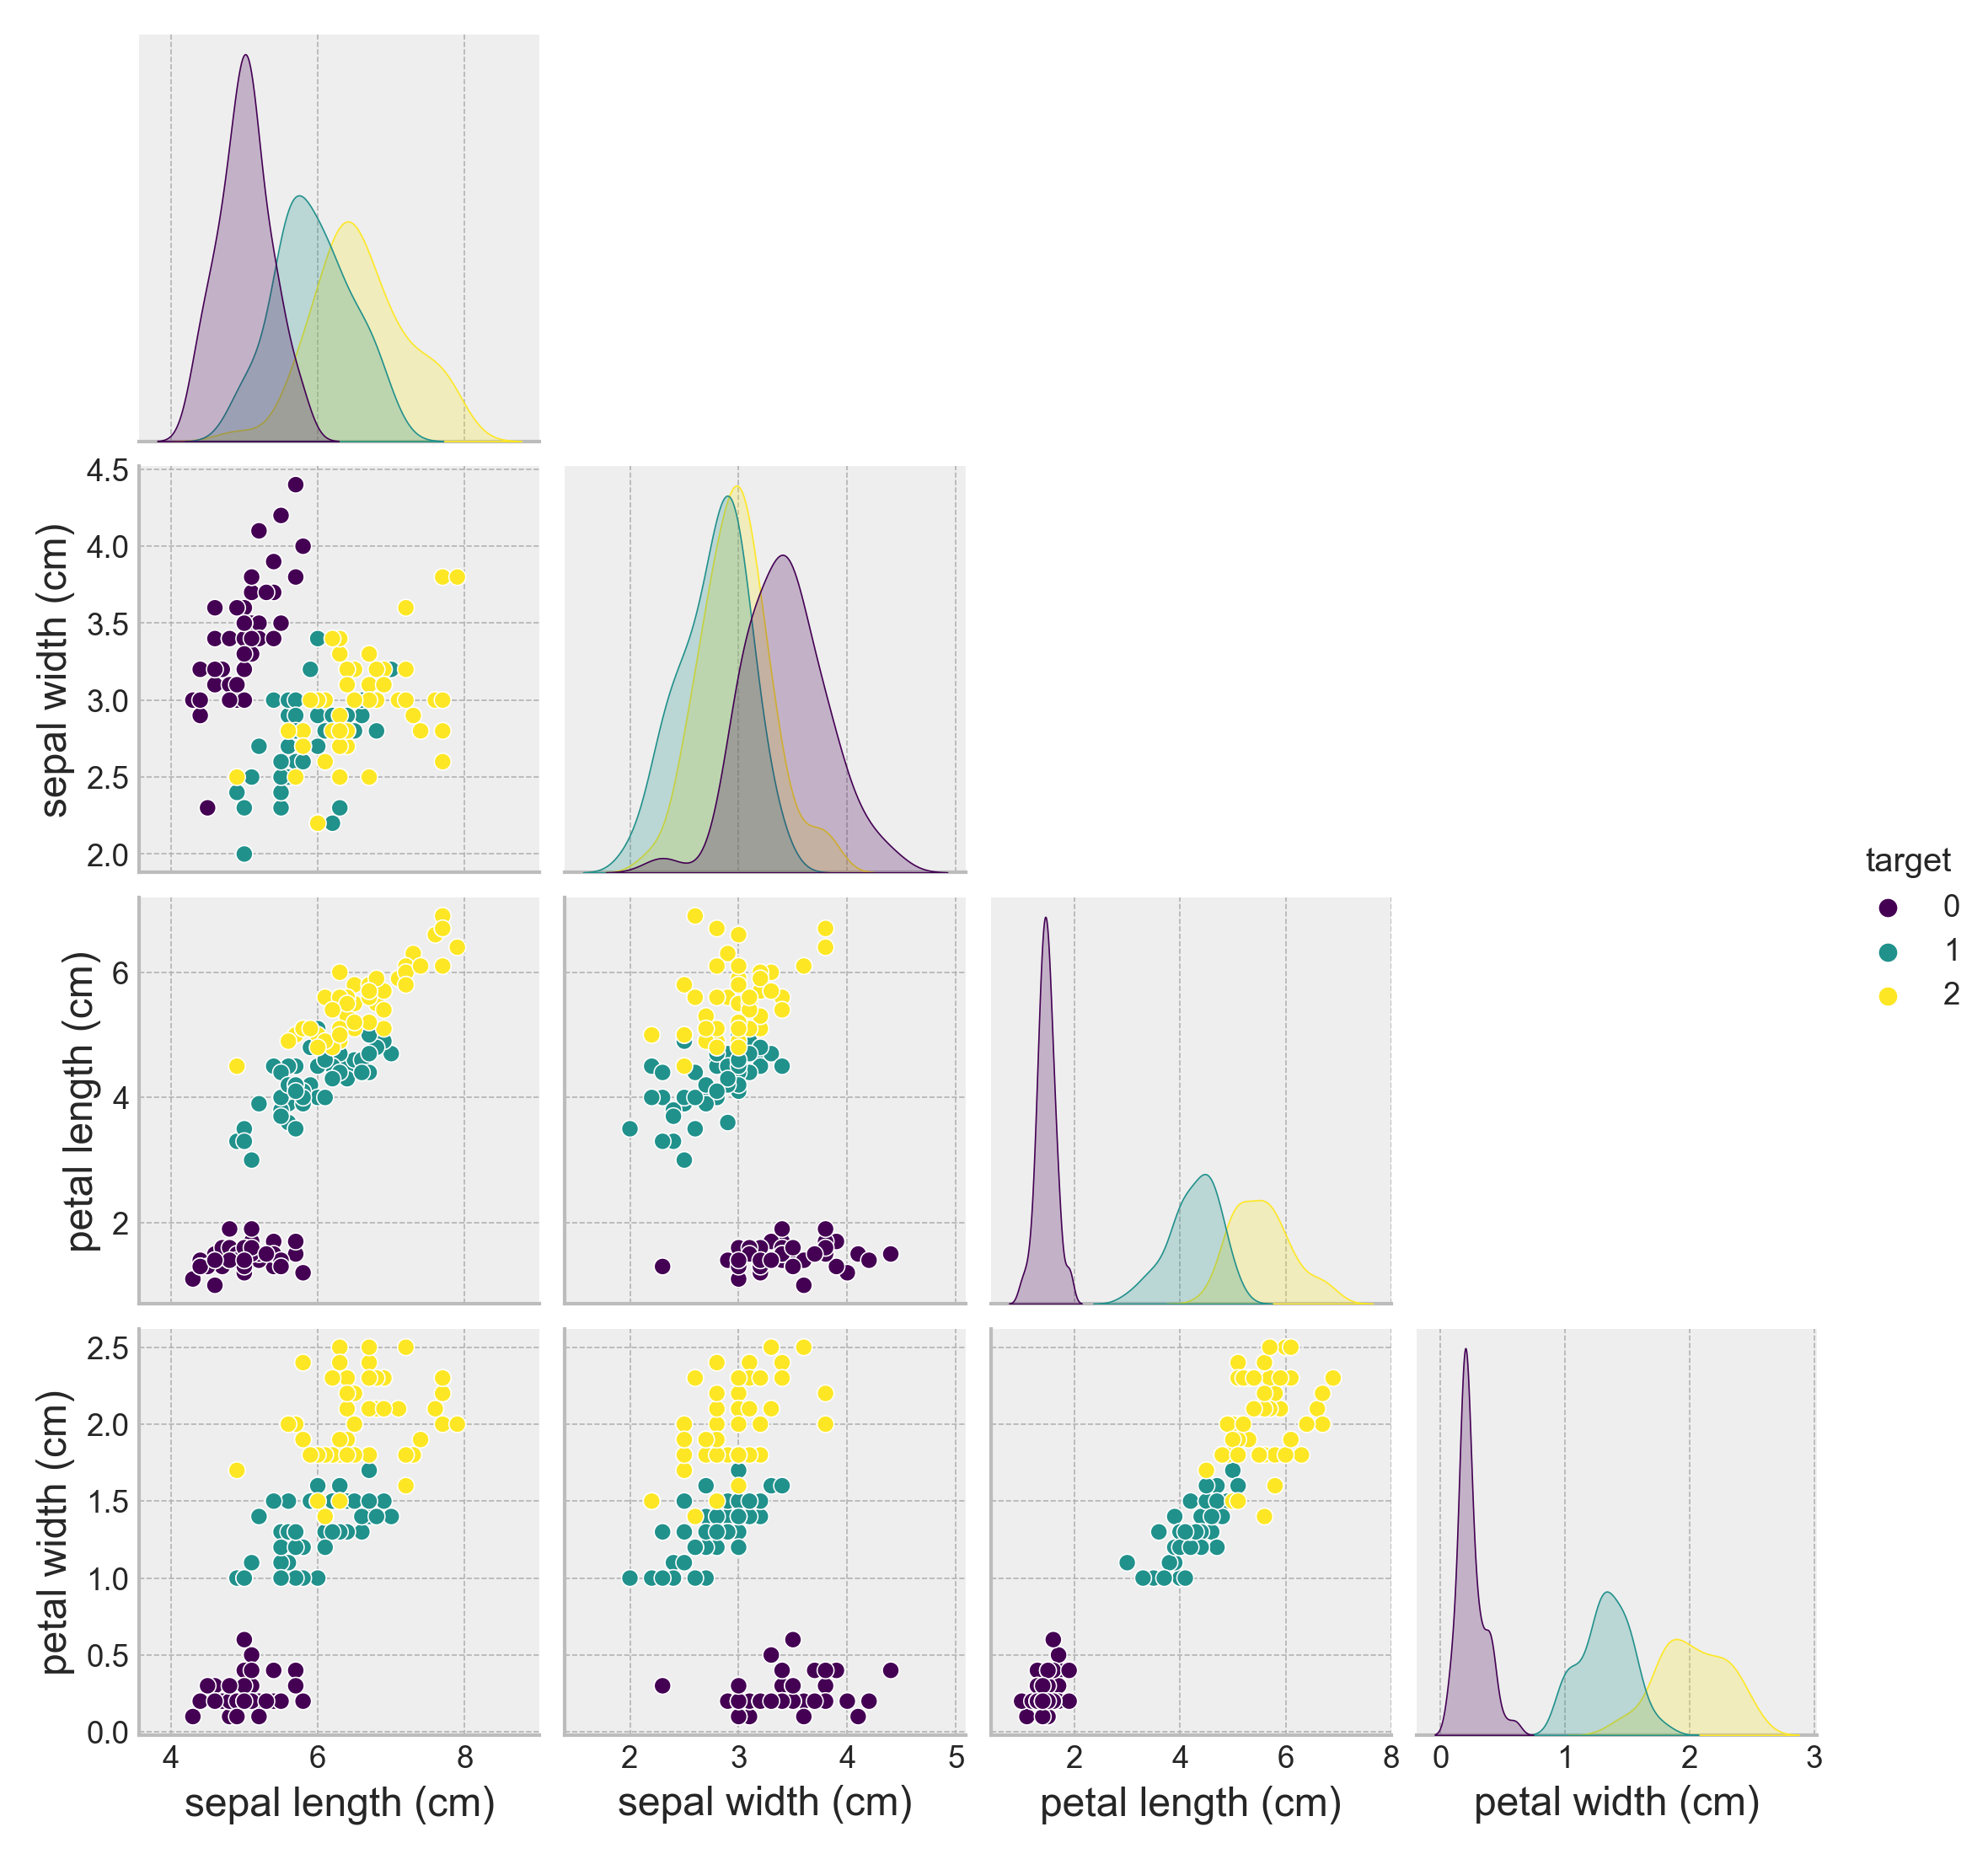

In [12]:
# Pairplot con todas las variables.
sns.pairplot(iris, hue="target", height=2.3, corner=True, palette="viridis");

Podemos observar que cada subespecie de flor en este dataset tiene propiedades tales que, al enfrentar varios pares de atributos, es posible separar claramente una de otra. Formalmente, se dice que un dataset de este tipo es fácilmente **separable**.

Con todo esto en mente, ya podemos avanzar hacia lo que es la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**.

## API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**.
La API de **<font color='mediumorchid'>Scikit-Learn</font>** está diseñada con los siguientes principios fundamentales en mente:

- **Consistencia:** Todos los objetos comparten una interfaz común, con un conjunto limitado de métodos, con documentación consistente.
- **Inspección:** Todos los valores de parámetros específicos son expuestos como atributos públicos.
- **Jerarquía limitada de objetos:** Solamente los algoritmos son representados como clases de Python; los datasets son representados es formatos de tipo estándar (arreglos de **<font color='mediumorchid'>Numpy</font>**, DataFrames de **<font color='mediumorchid'>Pandas</font>**, matrices dispersas de **<font color='mediumorchid'>Scipy</font>**), y los nombres de cada parámetro son simplemente strings de Python.
- **Composición:** Muchos problemas de machine learning pueden ser expresados como secuencias de algoritmos más fundamentales, y **<font color='mediumorchid'>Scikit-Learn</font>** hace uso de ello cada vez que sea posible.
- **Valores por defecto sensibles:** Cuando los modelos requieren parámetros especificados por el usuario, la librería siempre define valores apropiados por defecto para cada uno.

En la práctica, estos principios permiten que **<font color='mediumorchid'>Scikit-Learn</font>** sea extremadamente fácil de utilizar, una vez que dichos principios son entendidos apropiadamente. Cada algoritmo de machine learning en **<font color='mediumorchid'>Scikit-Learn</font>** se implementa mediante la API estimadora, lo que nos provee de una interfaz consistente con un amplio rango de aplicaciones.

### Elementos básicos de la API.
En general, los pasos a la hora de utilizar la API estimadora son los siguientes:

- Escoger una clase que represente la implementación de un determinado algoritmo de aprendizaje, importándola desde el módulo adecuado de **<font color='mediumorchid'>Scikit-Learn</font>** (por ejemplo, el módulo `sklearn.preprocessing` se especializa, como cabría esperar, en operaciones de pre-procesamiento de datos, incluyendo limpiezas, escalamientos y autoimputaciones).
- Escoger los **hiperparámetros** del modelo, generando las debidas instancias dentro de la clase con los valores deseados.
- Presentar la data dentro de una matriz de atributos y un vector objetivo, conforme lo comentado previamente.
- Ajustar el modelo a nuestros datos mediante el método `fit()` de la instancia que define el modelo. Cualquier modelo que implique un ajuste (o cualquier transformación que también lo requiera) siempre vendrá equipado, en su correspondiente clase, con este método.
- Aplicar el modelo a datos nuevos:
    - Para un problema de **aprendizaje supervisado**, en general realizamos predicciones vía el atributo `predict()`. Algunos modelos serán capaces de generar salidas en formato de probabilidades, para lo cual será común el uso del método `predict_proba()`.
    - Para un problema de **aprendizaje no supervisado**, con frecuencia, transformamos o inferimos propiedades mediante métodos tales como `transform()` o `predict()`.

**Ejemplo 2.1 – Un problema sencillo de regresión lineal:** Como ejemplo introductorio, consideremos un problema sencillo de regresión lineal. Vale decir, queremos ajustar una recta a un conjunto de datos en $\mathbb{R}^{2}$, comúnmente con ruido, que suele representarse por medio de un par $(x_{i}, y_{i})$, para un total de $m$ instancias (donde $i=1,...,m$). Para ejemplificar como implementar rápidamente un modelo de regresión lineal en **<font color='mediumorchid'>Scikit-Learn</font>**, crearemos algo de data sencilla haciendo uso del generador de números pseudoaleatorios de **<font color='mediumorchid'>Numpy</font>**:

In [13]:
# Definimos una semilla aleatoria fija.
rng = np.random.default_rng(42)

In [14]:
# Definimos un total de 50 puntos del tipo (X, y).
X = 10 * rng.random(size=50)
y = 2 * X - 1 + rng.normal(loc=0, scale=1, size=50)

<IPython.core.display.Javascript object>


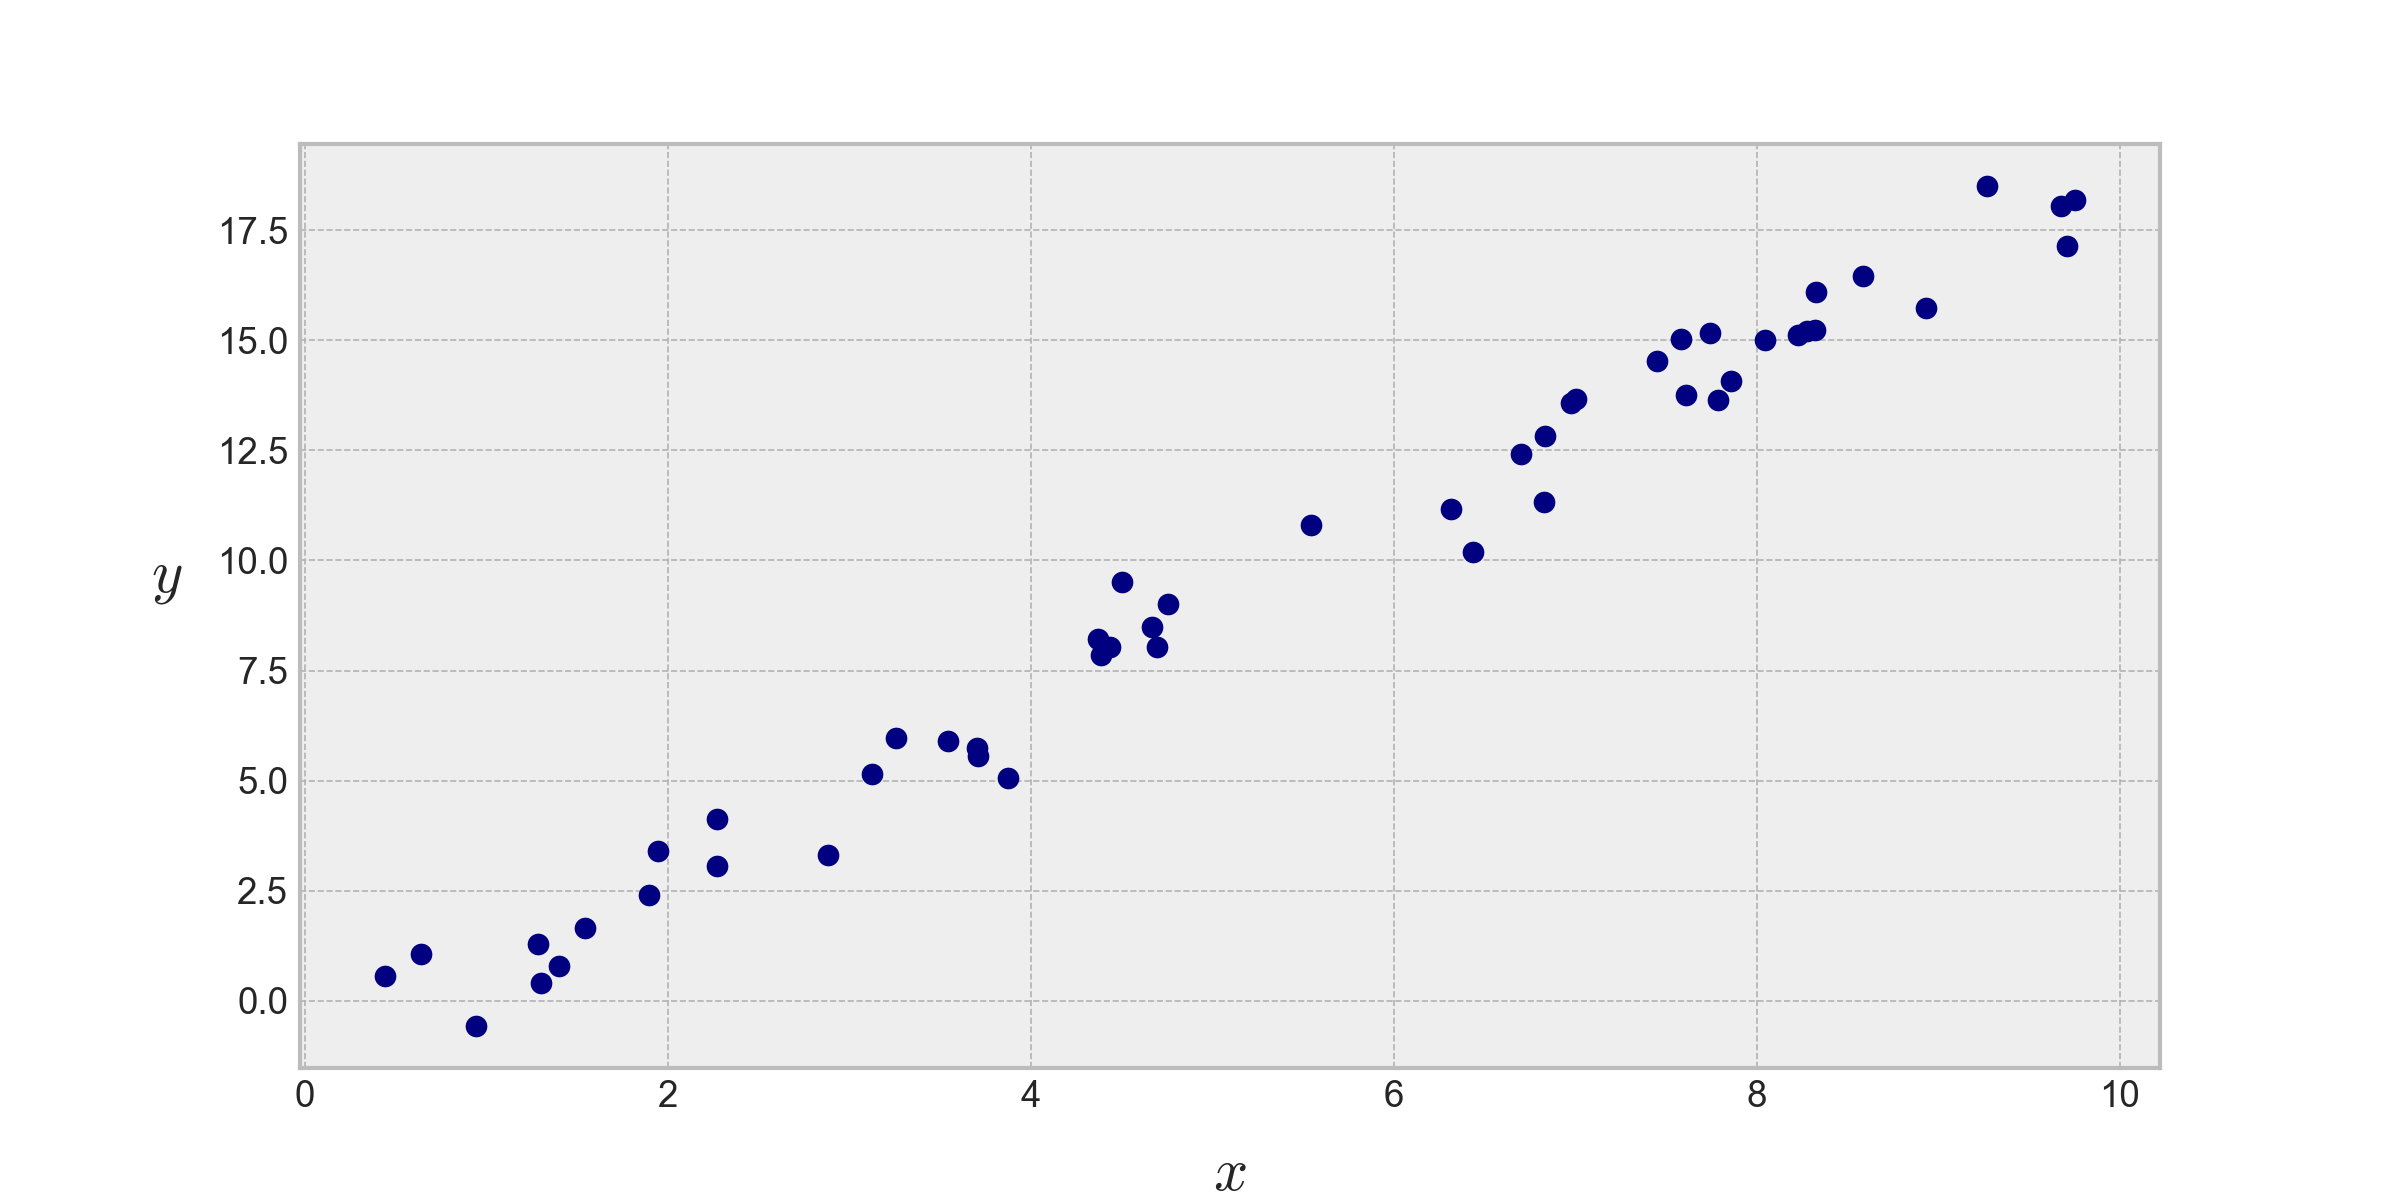

In [15]:
# Graficamos nuestro conjunto de datos.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="navy", marker="o")
ax.set_xlabel(r"$x$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=18, labelpad=15, rotation=0);

Con esta data ya definida, podemos utilizar la receta comentada previamente:

**<font color='darkred'>Paso 1 – Escoger una clase que define el modelo a implementar:</font>** En **<font color='mediumorchid'>Scikit-Learn</font>**, cada algoritmo de aprendizaje está representada por una clase de Python, las cuales se empaquetan en módulos que se corresponden con una determinada clase de algoritmos de aprendizaje. De esta manera, para el caso de modelos de regresión lineal generalizados, siempre buscaremos alternativas de algoritmos en el módulo `sklearn.linear_model`. Así, por ejemplo, si queremos desarrollar un modelo de regresión línea simple, podemos importar la clase `LinearRegression` de dicho módulo como sigue:

In [16]:
from sklearn.linear_model import LinearRegression

**<font color='darkred'>Paso 2 – Escoger los hiperparámetros del modelo:</font>** Cada algoritmo de aprendizaje es todo un mundo de opciones, e intentaremos describir tales opciones en un contexto general. Por ejemplo, la clase `LinearRegression` permite implementar un modelo de regresión lineal múltiple con base en un ajuste de mínimos cuadrados. Este modelo particular cuenta con algunos hiperparámetros:

- `fit_intercept`: Corresponde a un parámetro booleano que permite definir si el modelo a construir contará o no con un parámetro de sesgo. Como ya hemos visto en otras ocasiones, el modelo de regresión lineal puede escribirse, para el caso de $n$ atributos y una instancia $i$-ésima, como $y_{i}=\theta_{0}+\sum_{j=1}^{n}\theta_{j}x_{ij}$, siendo $\theta_{0}$ el mencionado parámetro de sesgo y $\mathbf{\theta}=(\theta_{1},...,\theta_{n})\in \mathbb{R}^{n}$ en vector donde agrupamos los parámetros (coeficientes) del modelo. Si `fit_intercept=False`, forzamos a **<font color='mediumorchid'>Scikit-Learn</font>** a que $\theta_{0}$ sea igual a cero.
- `positive`: Se trata de otro parámetro booleano, que permite forzar a **<font color='mediumorchid'>Scikit-Learn</font>** a que el ajuste sea tal que $\theta_{j}>0; \forall j=1,...,n$.

Los hiperparámetros definen las características propias que tendrá nuestro modelo y que dependen íntegramente de nuestro criterio como expertos en cada caso. Por esta razón, dependiendo de la clase que hayamos escogido, al seleccionar tales hiperparámetros, debemos hacer siempre el ejercicio de responder algunas de las siguientes preguntas:

- ¿Queremos que el ajuste incluya algún parámetro de sesgo (como un coeficiente de intercepción, en el caso del modelo de regresión lineal)?
- ¿Nos gustaría que el modelo esté normalizado (vale decir, que previamente tengamos que escalar nuestra matriz de atributos, de tal forma que cada una de las variables siga una distribución normal estándar)?
- ¿Queremos pre-procesar nuestros atributos para darle más flexibilidad a nuestro modelo (por ejemplo, implementar alguna transformación sobre los datos categóricos, o estandarizar datos numéricos)?
- ¿Qué nivel de regularización queremos implementar en nuestro modelo (a fin de reducir algunos problemas que veremos más adelante)?

Estos son ejemplos de decisiones importantísimas que debemos tomar una vez que hemos seleccionado la clase de modelo que queremos utilizar. Tales elecciones, con frecuencia, están representadas por hiperparámetros. En **<font color='mediumorchid'>Scikit-Learn</font>**, los hiperparámetros se escogen pasando sus respectivos valores cuando instanciamos una clase. No constituyen una decisión fácil, y muchas veces nuestro criterio no bastará para escoger un valor adecuado para cada uno. Pero toda línea base (es decir, un *primer modelo* contra el cual contrastaremos otros más sofisticados) requiere de tener una mínima noción de cuáles hiperparámetros utilizar.

Habiendo establecido lo anterior, vamos a construir pues un modelo de regresión lineal que sí disponga de un parámetro de sesgo. De esta manera, instanciaremos la clase `LinearRegression` a una variable llamada `model`, sobre la cual trabajaremos en forma posterior:

In [17]:
# Instanciamos nuestro modelo.
model = LinearRegression(fit_intercept=True)

In [18]:
# Mostramos esta instancia en pantalla.
model

LinearRegression()

Debemos tener en consideración que, cuando un modelo es instanciado, la única acción que ejecutamos es el almacenamiento de los respectivos hiperparámetros. En particular, aún no hemos realizado ningún ajuste del modelo a nuestros datos: La API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>** deja muy claro esto: No es lo mismo escoger un modelo que aplicarlo.

**<font color='darkred'>Paso 3 – Arreglar nuestra data en una matriz de atributos y un vector objetivo:</font>** Unas líneas atrás detallamos cómo es la representación de la data en **<font color='mediumorchid'>Scikit-Learn</font>**, la cual requiere una matriz de atributos bidimensional y un vector objetivo unidimensional. Aquí, nuestra variable objetivo ya tiene la geometría correcta (con tamaño `n_samples`):

In [19]:
# El vector de valores objetivo ya es unidimensional.
y.shape

(50,)

Sin embargo, necesitamos manipular la matriz de atributos `X` a fin de que cumpla con la geometría deseada, porque dicha matriz únicamente tiene una columna (ya que el modelo es univariante):

In [20]:
# Re-arreglamos nuestra matriz de atributos X.
X = X.reshape(-1, 1)

**<font color='darkred'>Paso 4 – Ajuste del modelo a nuestra data:</font>** Ahora es tiempo de aplicar nuestro modelo a nuestros datos. Esto puede lograrse rápidamente con el método `fit()`:

In [21]:
# Ajustamos nuestro modelo.
model.fit(X, y)

LinearRegression()

El uso del método `fit()` genera una (a veces, enorme) cadena de operaciones internas, dependientes por supuesto del modelo escogido, almacenándose cada uno de los resultados en atributos específicos de la clase del modelo que, una vez realizado el ajuste, podemos explorar vía métodos o atributos.

En **<font color='mediumorchid'>Scikit-Learn</font>**, por convención, todos los parámetros de un modelo que fueron aprendidos mediante el método `fit()` se especifican siempre como atributos con un guión bajo (*underscore*, `_`) como sufijo. Por ejemplo, para el caso del modelo que ajustamos previamente, tenemos:

In [22]:
# Pendiente de la recta de ajuste (con más variables, se muestran todos los coeficientes).
model.coef_

array([2.01207601])

In [23]:
# Parámetro de sesgo del modelo (coeficiente de intercepción).
model.intercept_

-1.2313410667136875

Estos dos parámetros representan la pendiente y el coeficiente de intercepción de la recta de regresión obtenida. Si comparamos esto con el bloque de código donde generamos la data en primera instancia, veremos que están relativamente cerca de los valores originales, 2 y -1, respectivamente.

**<font color='darkred'>Paso 5 – Predecir valores para datos nuevos:</font>** Una vez que ya hemos entrenado un modelo, la tarea principal del aprendizaje supervisado corresponde a la evaluación de dicho modelo basado en lo que éste predice en datos que no fueron parte de su conjunto de datos de entrenamiento, lo que se lograen este caso por medio del método `predict()`. Por ejemplo:

In [24]:
# Generamos algo de data nueva
X_new = np.linspace(start=-1, stop=11, num=50)

In [25]:
# Redimensionamos el arreglo anterior.
X_new = X_new.reshape(-1, 1)

In [26]:
# Obtenemos predicciones para estos datos nuevos.
y_new_pred = model.predict(X_new)

Si comparamos las predicciones obtenidas con los puntos previamente generados por medio de un gráfico, obtenemos el siguiente resultado:

<IPython.core.display.Javascript object>


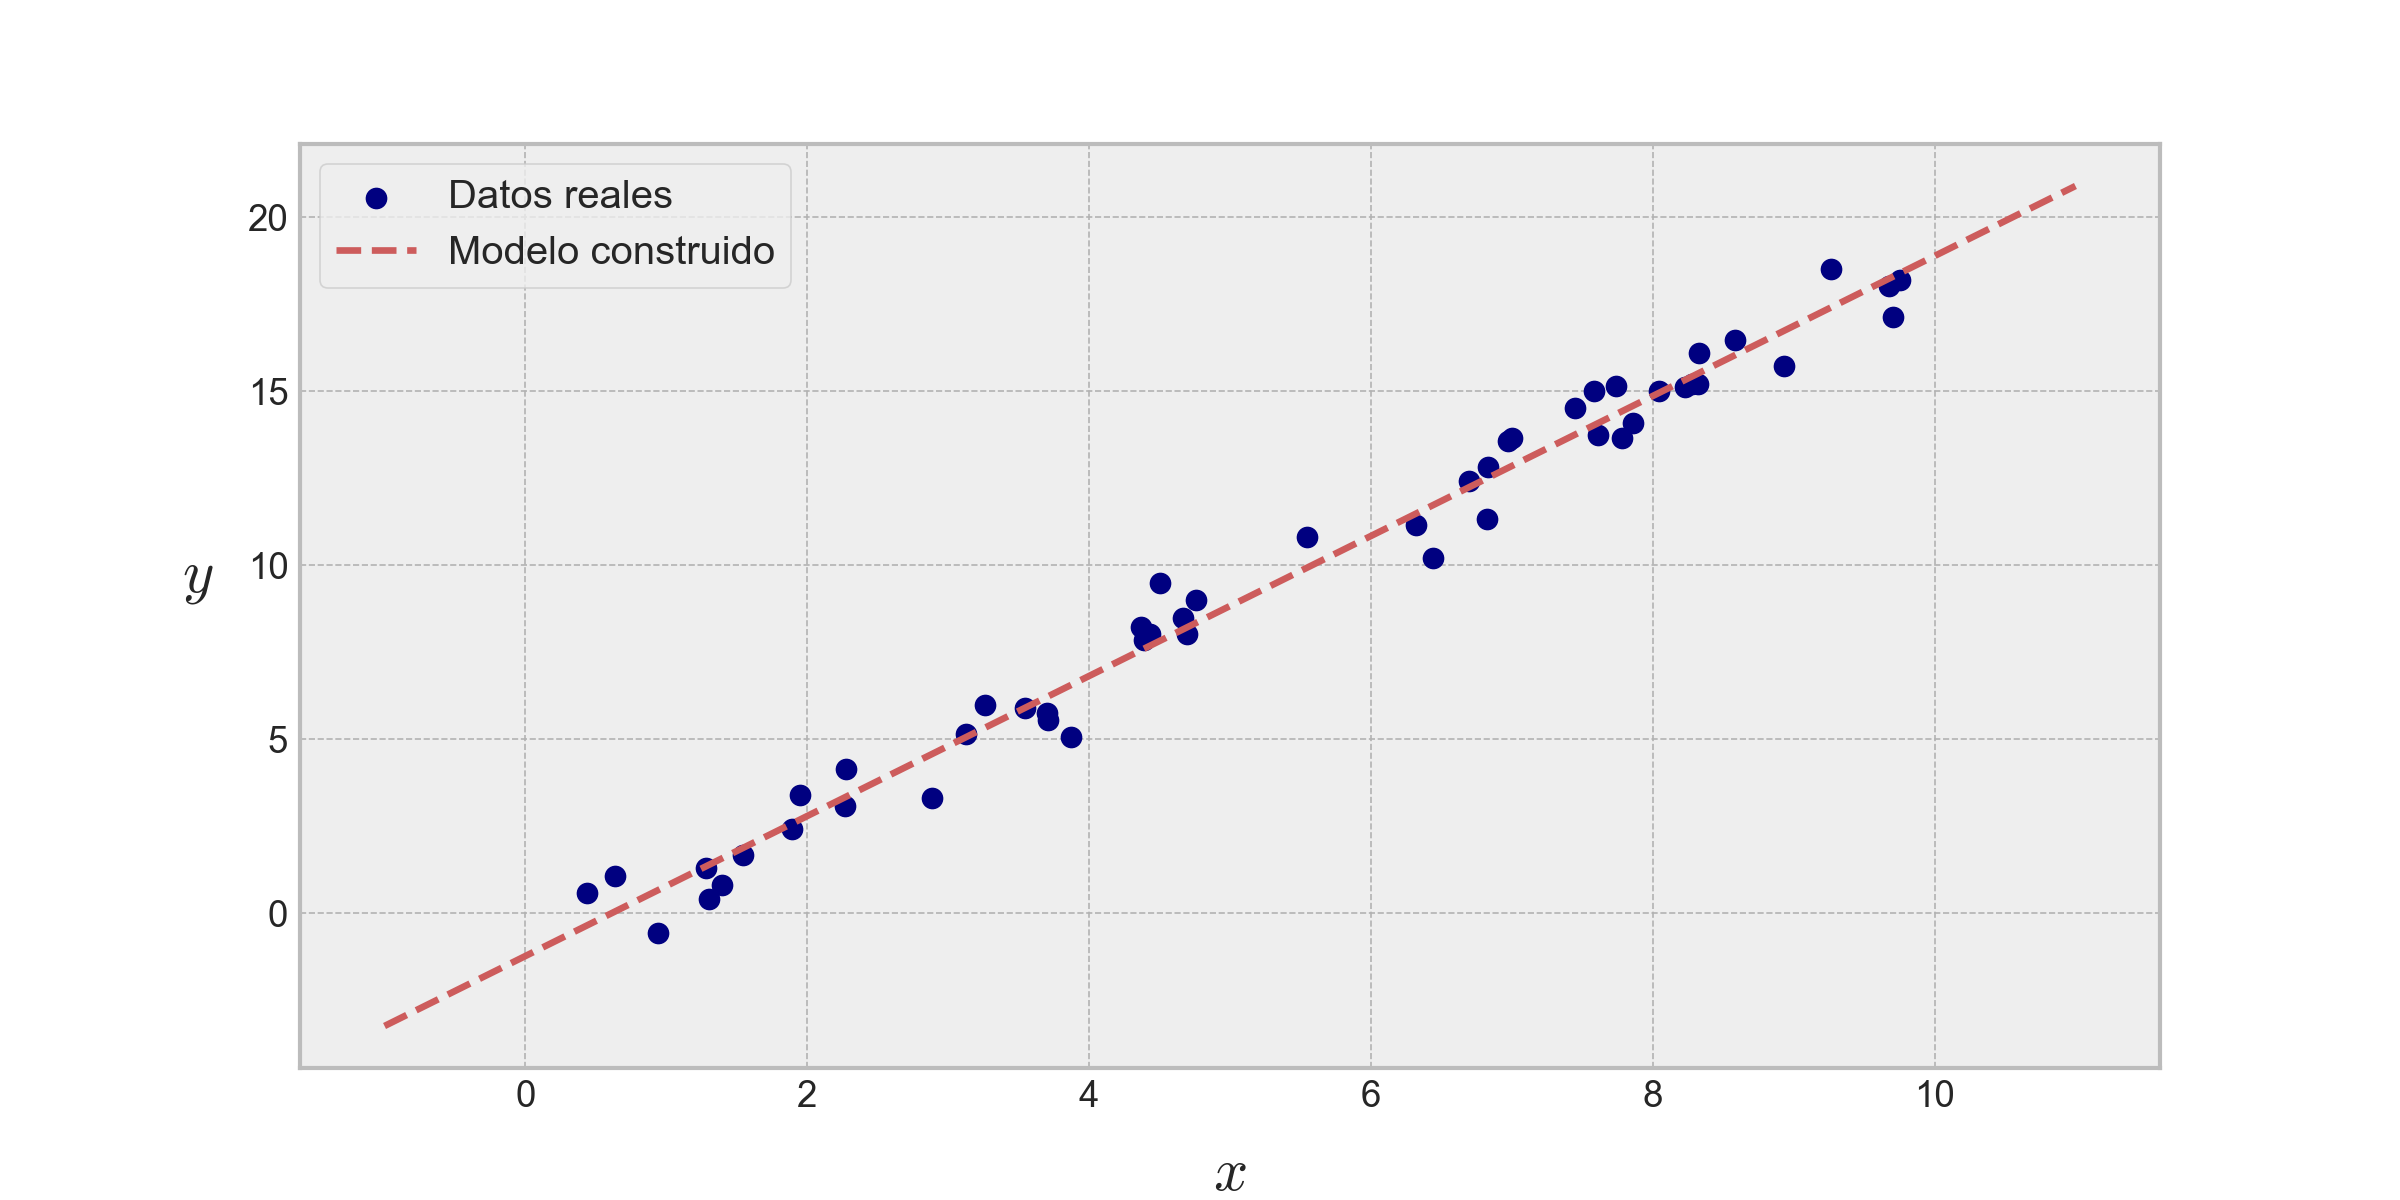

In [27]:
# Graficamos nuestros resultados.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="navy", marker="o", label="Datos reales")
ax.plot(X_new, y_new_pred, color="indianred", linestyle="--", label="Modelo construido")
ax.legend(loc="best", fontsize=12, frameon=True)
ax.set_xlabel(r"$x$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=18, labelpad=15, rotation=0);

◼︎

Típicamente, la calidad de un modelo se contraste con respecto a una determinada línea base, como veremos en el siguiente ejemplo.

**Ejemplo 2.2 – Un problema sencillo de clasificación:** Vamos a ilustrar un ejemplo de implementación de modelo de clasificación en este caso, haciendo uso del *toyset* **<font color='forestgreen'>IRIS</font>**, que ya cargamos previamente. En un modelo de clasificación intentamos predecir las categorías a las cuales pertenecen las instancias de un conjunto de datos, las que en este dataset particular se corresponden con las subespecies de flor Iris para cada observación.

Para este problema, trabajaremos con un algoritmo de aprendizaje extremadamente simple conocido como **modelo de Bayes ingenuo** (del inglés *Naive Bayes*). Dado que es un modelo de ajuste muy rápido y sin hiperparámetros que debamos definir, este modelo de Bayes ingenuo típicamente conforma una **línea base** bastante buena a la hora de trabajar en cualquier problema de clasificación de información, antes de explorar otras alternativas de mayor complejidad.

Nos gustaría evaluar nuestro modelo en data que no haya visto durante su entrenamiento, por lo cual haremos una división del dataset en dos subconjuntos bien definidos: Un **conjunto de entrenamiento** y un **conjunto de prueba**. Esto podría perfectamente realizarse a mano, pero **<font color='mediumorchid'>Scikit-Learn</font>** nos ofrece de varias opciones para separar un dataset completo en tales subconjuntos, todas ellas en el módulo `sklearn.model_selection`. Un ejemplo es la función `train_test_split()`, la que permite dividir un conjunto de datos con base en una proporción de datos que se irán al conjunto de prueba, sin tener en consideración el orden de los datos ni tampoco su distribución con respecto a cada subconjunto de interés (como veremos más adelante, este último punto puede resultar ser muy importante):

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Nuevamente, asignamos la matriz de atributos y el vector de valores objetivo relativos al
# dataset IRIS.
X = iris_dataset["data"]
y = iris_dataset["target"]

In [30]:
# Separamos nuestro dataset en conjuntos de entrenamiento y de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Notemos que la función `train_test_split()` acepta directamente la matriz de atributos `X` y el arreglo de valores objetivo `y` como entradas, creando una estructura exactamente igual a esta, pero separada en conjuntos de entrenamiento (`X_train` e `y_train`) y de prueba (`X_test` e `y_test`). La proporción de cuánta data queramos dejar fuera del entrenamiento y pasarla al conjunto de prueba siempre puede controlarse mediante el argumento `test_size`, el cual es un valor que va desde 0 a 1, y representa dicha proporción en tanto por uno. En este ejemplo, hemos dejado un 20% de los datos para el conjunto de prueba.

Prácticamente todas las herramientas provistas por **<font color='mediumorchid'>Scikit-Learn</font>** cuentan con el parámetro `random_state`, el que establece una **semilla aleatoria fija** para mantener la **reproducibilidad** de cualquier experimento que hagamos haciendo uso de modelos o transformadores de esta librería.

Con la data ya separada en conjuntos de entrenamiento y de prueba, seguimos nuestra receta para llegar a nuestras predicciones. En este caso particular, el modelo de Bayes ingenuo puede implementarse rápidamente por medio de la clase `GaussianNB`, la cual depende del módulo `sklearn.naive_bayes`. Recordemos que el objetivo de esta sección no es aprender a implementar modelos, sino simplemente mostrar como funciona la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**. Ya nos preocuparemos de describir en detalle varios algoritmos de aprendizaje y sus correspondientes implementaciones en **<font color='mediumorchid'>Scikit-Learn</font>** en las secciones siguientes:

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
# Instanciamos el modelo.
model = GaussianNB()

In [33]:
# Ajustamos el modelo.
model.fit(X_train, y_train)

GaussianNB()

In [34]:
# Realizamos predicciones.
y_test_pred = model.predict(X_test)

Luego utilizamos alguna métrica de calidad adecuada para, valga la redundancia, medir la calidad del ajuste de nuestro modelo. En este caso, usaremos una métrica conocida como **exactitud**, la cual corresponde a la proporción de categorías con respecto al total que el modelo es capaz de estimar correctamente. Las métricas de desempeño de los modelos de **<font color='mediumorchid'>Scikit-Learn</font>** *viven* en el módulo `sklearn.metrics`, y puntualmente la exactitud puede implementarse por medio de la función `accuracy_score()`. Toda métrica relativa a modelos de aprendizaje supervisado requiere de dos parámetros: `y_true` (el valor objetivo real propio del dataset) e `y_pred` (el valor que hemos predicho a partir de nuestro modelo). Luego tenemos:

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
# Calculamos la exactitud de nuestro modelo en los datos de prueba.
acc_score = accuracy_score(y_true=y_test, y_pred=y_test_pred)

In [37]:
# Mostramos este valor en pantalla.
print(f"Exactitud del modelo: {100 * round(acc_score, 3)}%")

Exactitud del modelo: 83.3%


El valor de exactitud que hemos obtenido es, por tanto, nuestra **línea base**. Y contra ese valor es que competiremos a la hora de construir modelos más sofisticados. ◼︎

Si bien los algoritmos de aprendizaje supervisado serán abordados en la Parte III de este repositorio, es bueno que observemos igualmente cómo **<font color='mediumorchid'>Scikit-Learn</font>** suele trabajar modelos de esta naturaleza. Esto se ilustrará en el siguiente ejemplo, pero siempre bajo la premisa de que no queremos (aún) aprender en detalle a implementar modelos de este tipo. Sólo estamos observando como trabaja la API de **<font color='mediumorchid'>Scikit-Learn</font>**.

**Ejemplo 2.3 – Reducción de la dimensión del toyset <font color='forestgreen'>IRIS</font>:** Como ejemplo de problema de aprendizaje no supervisado, veamos como podemos reducir la dimensión del dataset **<font color='forestgreen'>IRIS</font>** a fin de que su visualización sea más sencilla. Con *reducir la dimensión* de un dataset nos referimos, de manera general, a que si dicho dataset consiste de un total de $n$ atributos, queremos preservar la mayor cantidad de información posible del mismo usando únicamente $k$ de esas variables, siendo $k<n$.

Recordemos que, conforme lo visto previamente, el dataset **<font color='forestgreen'>IRIS</font>** tiene cuatro dimensiones (cuatro atributos, además de la variable de respuesta).

El objetivo de la reducción de la dimensión en un conjunto de datos es pues cuestionar si existe una representación del mismo que permita retener la mayor cantidad de información posible del mismo, pero con una cantidad menor de atributos. Con frecuencia, esta técnica es utilizada para obtener representaciones visuales optimizadas de un dataset, ya que, después de todo, es más sencillo (por no decir *plausible*) graficar datos bidimensionales que tetradimensionales.

En este ejemplo, implementaremos un algoritmo de aprendizaje no supervisado conocido como **análisis de componentes principales** (PCA, del inglés *principal component analysis*), la cual constituye el algoritmo de reducción de dimensionalidad a escala lineal más sencillo que tenemos a nuestra disposición, y que está basado casi enteramente en una aplicación muy elegante de la descomposición de valores singulares. Requeriremos que este modelo nos devuelva únicamente dos componentes de la data; es decir, una representación bidimensional de un dataset que, como sabemos, es tetradimensional.

Los algoritmos de aprendizaje no supervisado que tienen como objetivo reducir las dimensiones de un dataset *viven* en el módulo `sklearn.decomposition`. En este caso particular, el análisis de componentes principales, en su versión más elemental, suele implementarse mediante la clase `PCA`, en la cual seteamos el parámetro `n_components` para determinar el número de atributos (componentes) al que queremos llegar, que en este ejemplo particular son dos. Tales componentes no serán dos de las variables originales del dataset, sino que dos variables que resultan de una transformación en la cual intentamos capturar la mayor cantidad posible de información (representada por la varianza inherente del dataset), y que serán ortogonales entre sí en un dominio del plano $\mathbb{R}^{2}$.

De nuestra ya conocida receta, tenemos que:

In [38]:
from sklearn.decomposition import PCA

In [39]:
# Ajustamos el modelo a nuestra matriz de atributos (notemos que no usamos las etiquetas presentes
# en el vector de valores objetivo).
model = PCA(n_components=2)

In [40]:
# Ajustamos el modelo a la totalidad de los datos.
model.fit(X)

PCA(n_components=2)

In [41]:
# Transformamos nuestro dataset, a fin de obtener las componentes resultantes.
X_2D = model.transform(X)

In [42]:
# ... las cuales son, efectivamente, dos.
X_2D.shape

(150, 2)

Hemos ganado, por tanto, una representación de la data que consta únicamente de dos atributos, en vez de los cuatro originales. Si graficamos tales componentes, podremos diferenciar inmediatamente donde se emplaza cada categoría (subespecie) de flor Iris:

In [43]:
# Agregamos las componentes obtenidas al DataFrame original que contiene al dataset IRIS.
iris["PC1"] = X_2D[:, 0]
iris["PC2"] = X_2D[:, 1]

<IPython.core.display.Javascript object>


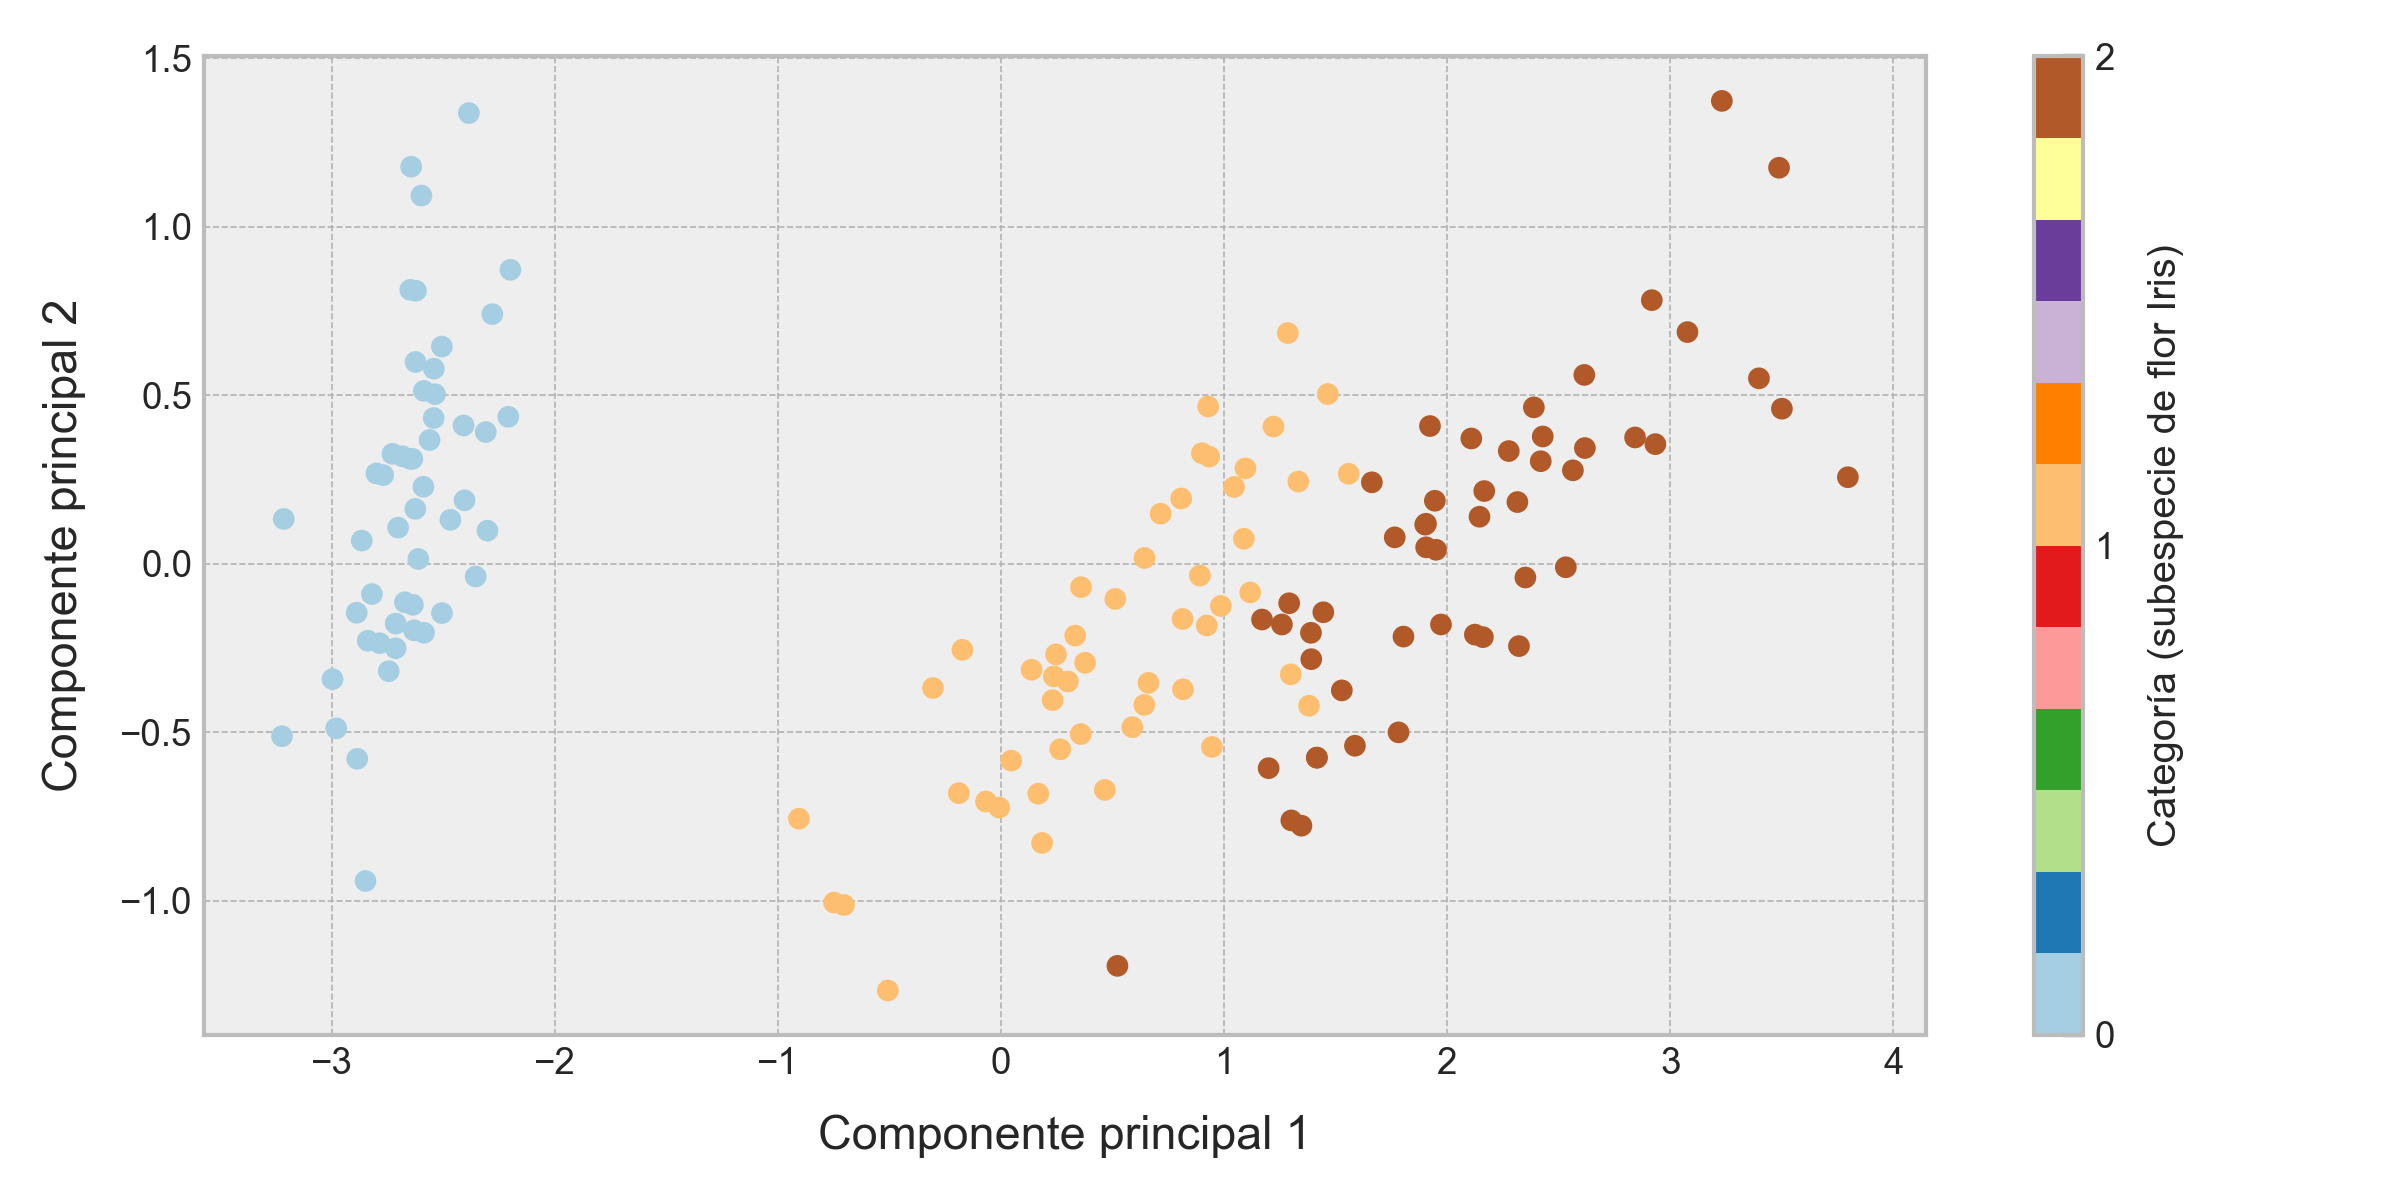

In [44]:
# Graficamos las componentes obtenidas.
fig, ax = plt.subplots(figsize=(10, 5))
p = ax.scatter(x=iris["PC1"], y=iris["PC2"], c=iris["target"], cmap="Paired")
cb = fig.colorbar(p)
cb.ax.locator_params(nbins=3)
cb.set_label("Categoría (subespecie de flor Iris)", fontsize=12, labelpad=10)
ax.set_xlabel("Componente principal 1", fontsize=14, labelpad=10)
ax.set_ylabel("Componente principal 2", fontsize=14, labelpad=10)
plt.tight_layout();

Vemos entonces que, en la representación bidimensional de nuestra data, las distintas especies de Iris son fácilmente distinguibles (separables), incluso aunque el algoritmo de PCA no tiene ni la más mínima idea de dicho concepto de especie. Esto nos indica que un modelo de clasificación relativamente sencillo debiera poder discriminar razonablemente bien estas clases. ◼︎

**Ejemplo 2.4 – Agrupamiento (clustering) del toyset <font color='forestgreen'>IRIS</font>**: Otra aplicación importante de los algoritmos de aprendizaje supervisado corresponde al agrupamiento de instancias en un dataset a partir de ciertas similitudes entre los datos. Tales *similitudes* no son las mismas de algoritmo a algoritmo. Algunas implementaciones toman como métrica de similitud distancias euclidianas con respecto a un *centroide* previamente seteado en nuestro conjunto de datos, mientras que otras buscan similitudes a partir de la función de densidad conjunta que permite describir el vector aleatorio a partir del cual se han *muestreado* las variables que constituyen el dataset completo, usualmente asumiendo que dicha función de densidad es una mezcla o mixtura de otras densidades más simples. Esta es precisamente la idea detrás de los llamados **modelos de mixtura Gaussiana**, donde asumimos que la función de densidad es una mixtura de otras densidades de tipo normal.

Los modelos de mixtura *viven* en el módulo `sklearn.mixture`. En nuestro caso particular, haremos uso de la clase `GaussianMixture` para implementar un modelo de mixtura Gaussiana muy sencillo, de manera tal que, a partir de la densidad observada en el dataset **<font color='forestgreen'>IRIS</font>**, podamos inferir similitudes entre cada instancia. Por regla general, el número de grupos a los que asociaremos estas instancias es un hiperparámetro, el cual setearemos, para este caso particular, en 3. También setearemos en parámetro `covariance_type` en `full`, lo que implicará que cada componente de mixtura tendrá su propia matriz de covarianza, la cual puede tomar cualquier tipo de ordenamiento:

In [45]:
from sklearn.mixture import GaussianMixture

In [46]:
# Instanciamos nuestro modelo.
model = GaussianMixture(n_components=3, covariance_type="full")

In [47]:
# Ajustamos nuestro modelo.
model.fit(X)

GaussianMixture(n_components=3)

In [48]:
# Predecimos los grupos o clusters a los cuales pertenecerá cada instancia según nuestro modelo.
y_gmm = model.predict(X)

Vamos a incorporar esta información al dataset original, y graficaremos nuestros resultados:

In [49]:
# Añadimos los clusters al dataset original.
iris["cluster"] = y_gmm

<IPython.core.display.Javascript object>


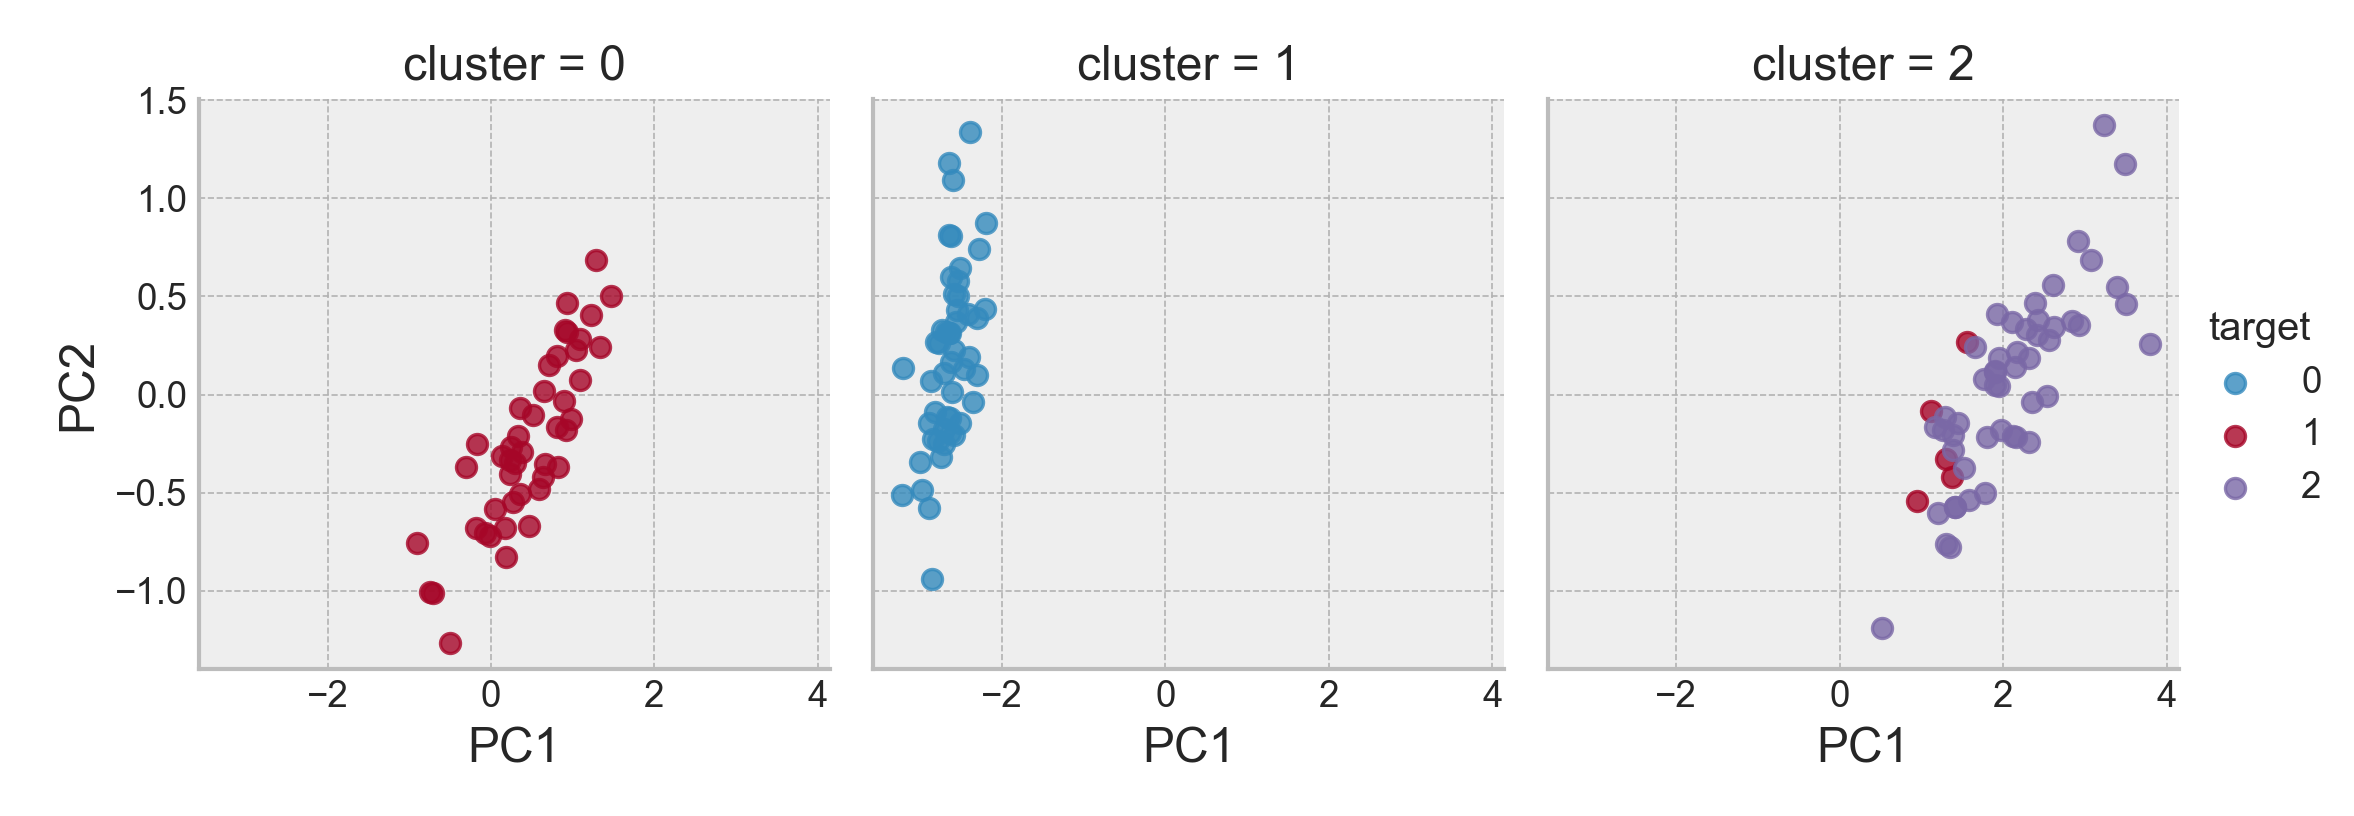

In [50]:
# Graficamos los resultados.
sns.lmplot(x="PC1", y="PC2", data=iris, hue='target', col='cluster', height=3.4, fit_reg=False, aspect=0.9);

Podemos observar que los clusters determinados por nuestro modelo son muy similares a las categorías que especifican las subespecies de Iris que son representadas por cada una de las instancias del modelo, existiendo una superposición más evidente en el cluster número 2, donde una pequeña fracción de instancias de la subespecie Iris Versicolor (`target=1`) se traslapa con instancias que pertenecen a la clase Iris Virginica (`target=2`). ◼︎

**Ejemplo 2.5 – Un ejemplo que considera el uso de imágenes:** Vamos a aplicar las recetas que hemos mostrado previamente a un problema cuyo conjunto de datos está compuesto por imágenes. Para ello, haremos uso de otro *toyset* muy conocido en el mundo de la ciencia de datos, llamado **<font color='forestgreen'>DIGITS</font>**, el cual está compuesto por un total de 1797 imágenes de 8$\times$8 pixeles, cada una de las cuales muestra un determinado dígito, del 0 al 9, los cuales fueron escritos a mano por un total de 60 personas. Estas imágenes están etiquetadas por un número, también del 0 al 9, que representa el dígito con el cual se corresponde a cada una.

Para cargar este *toyset* por medio de **<font color='mediumorchid'>Scikit-Learn</font>**, usaremos la función `load_digits()`, la cual podemos importar desde el módulo `sklearn.datasets`:

In [51]:
from sklearn.datasets import load_digits

In [52]:
# Cargamos nuestro dataset.
digits = load_digits(as_frame=True)

In [53]:
# Y mostramos en pantalla la descripción del mismo.
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Este dataset es famoso porque ha sido usado por infinidad de investigadores y profesionales para probar sistemas de reconocimiento de imágenes basados en algoritmos de aprendizaje. En la práctica, aquello involucra ambos, localizar e identificar caracteres en una imagen, de tal manera que un modelo pueda discriminar a qué dígito representa cada una de ellas.

Las imágenes, como ya hemos comentado en el repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main), suelen representarse en una escala de grises por medio del uso de arreglos bidimensionales, de tal forma que la geometría de estos arreglos define las dimensiones de la imagen. En el siguiente bloque de código visualizaremos las primeras cien imágenes de este conjunto de datos:

<IPython.core.display.Javascript object>


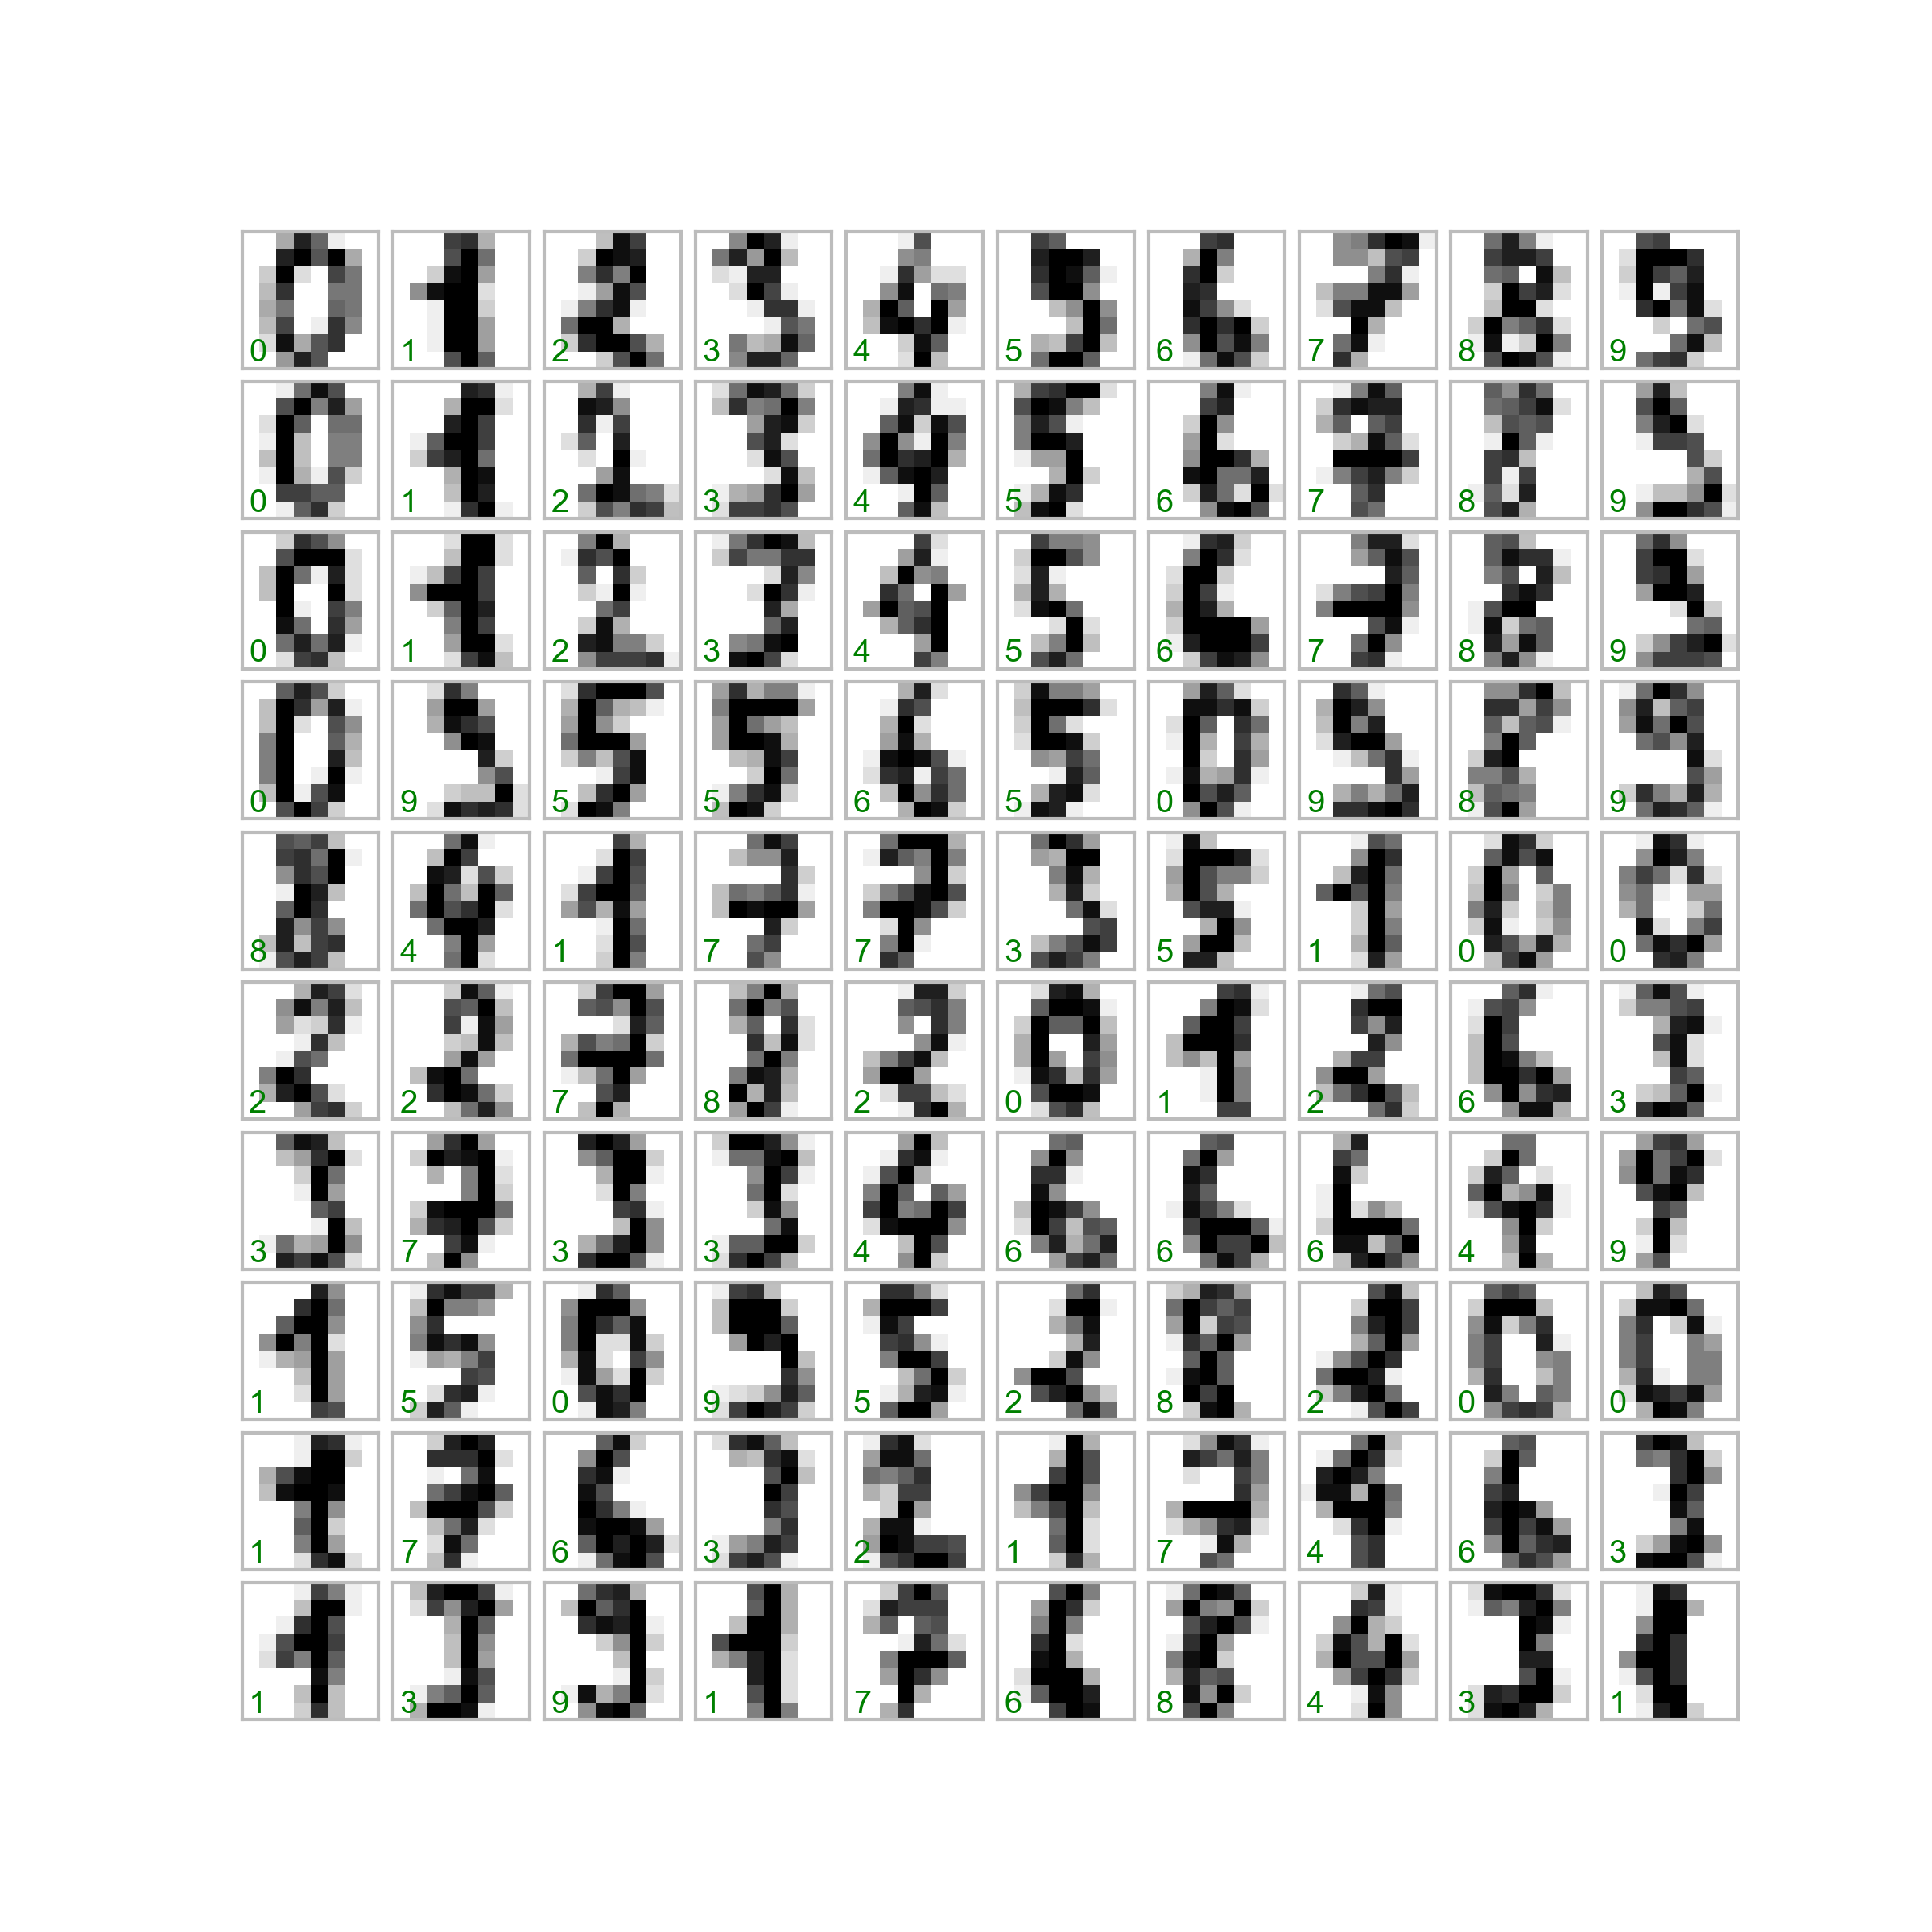

In [54]:
# Visualizamos las primeras 100 imágenes de este dataset.
fig, axes = plt.subplots(
    nrows=10, ncols=10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, 
    gridspec_kw=dict(hspace=0.1, wspace=0.1)
)
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green');

En la imagen anterior, hemos establecido además la etiqueta asociada a cada una de estas imágenes, a fin de aclarar qué dígito representa cada una de ellas.

A fin de trabajar con este conjunto de datos en **<font color='mediumorchid'>Scikit-Learn</font>**, necesitamos una matriz de atributos que especifique las correspondientes variables independientes que describen el dataset completo. Podemos lograr aquello tratando a cada pixel en la imagen como un atributo distinto: Esto es, aplanando el arreglo original que representa a una imagen arbitraria (que, por ser de 8$\times$8 pixeles, tiene una geometría `(8, 8)`), de manera que obtengamos un arreglo de morfología `(1797, 64)`; es decir, las 1797 instancias y las 64 posiciones distintas que ocupa un pixel en cada imagen. 

Adicionalmente, necesitamos el vector de valores objetivo, el que corresponde a la clase o categoría que establece a qué número corresponde cada dígito. Ambos arreglos están construidos dentro del dataset provisto por **<font color='mediumorchid'>Scikit-Learn</font>**, mapeados por las llaves `"data"` y `"target"`, igual que en el caso del *toyset* **<font color='forestgreen'>IRIS</font>**:

In [55]:
# Matriz de atributos de nuestro dataset.
X = digits["data"]

In [56]:
# Arreglo de valores objetivo de nuestro dataset.
y = digits["target"]

Es evidente que sería extraordinario visualizar nuestro dataset en un espacio de 64 dimensiones (porque, recordemos, cada instancia del mismo es un vector $\mathbf{x}_{i}\in \mathbb{R}^{64}$), pero aquello está más allá de lo que podemos hacer. En vez de ello, reduciremos el número de dimensiones de este dataset a sólo dos, haciendo uso de un algoritmo de aprendizaje supervisado que se especialice en la reducción de dimensiones de un conjunto de datos. A diferencia de lo que hicimos antes con el *toyset* **<font color='forestgreen'>IRIS</font>**, donde aplicamos un sencillo análisis de componentes principales, esta vez implementaremos un modelo más sofisticado, donde intentaremos *aprender* la estructura intrínseca al dataset sin restringirnos a una descripción geométrica euclidiana. Esto se conoce como **aprendizaje de variedades**, donde la palabra *variedad* hace referencia a una abstracción conocida como [*variedad diferencial*](https://en.wikipedia.org/wiki/Manifold), y que es un objeto que generaliza el concepto de (híper)superficie en un espacio arbitrario. Puntualmente, haremos uso de un método llamado **ISOMAP**, el cual es capaz de determinar los aspectos geométricos de la variedad donde *vive* el dataset, a fin de reducir su dimensión tomando en cuenta dicha geometría, en vez de simplemente reducir todo a componentes lineales ortogonales entre sí (como ocurre con el análisis de componentes principales). Esto es mucha información, pero no nos preocupemos de los detalles por ahora (insistimos, ya llegaremos a las secciones donde abordaremos estos algoritmos en detalle).

Los algoritmos de aprendizaje de variedades de **<font color='mediumorchid'>Scikit-Learn</font>** están disponibles en el módulo `sklearn.manifold`. Puntualmente, el modelo ISOMAP puede implementarse mediante la clase `Isomap`, en la cual especificaremos que deseamos reducir la dimensión de nuestro dataset de $\mathbb{R}^{64}$ a $\mathbb{R}^{2}$ haciendo uso del parámetro `n_components`:

In [57]:
from sklearn.manifold import Isomap

In [58]:
# Instanciamos nuestro modelo.
model = Isomap(n_components=2)

In [59]:
# Ajustamos nuestro dataset (solamente las imágenes) a este modelo.
model.fit(X)

Isomap()

In [60]:
# Y retornamos finalmente las componentes resultantes de la transformación.
X_2D = model.transform(X)

In [61]:
# Notemos que este nuevo dataset reducido tiene sólo dos variables.
X_2D.shape

(1797, 2)

Vamos a graficar el resultado de nuestro trabajo. Queremos observar, para las componentes obtenidas, si efectivamente cada dígito es un cluster en sí mismo:

<IPython.core.display.Javascript object>


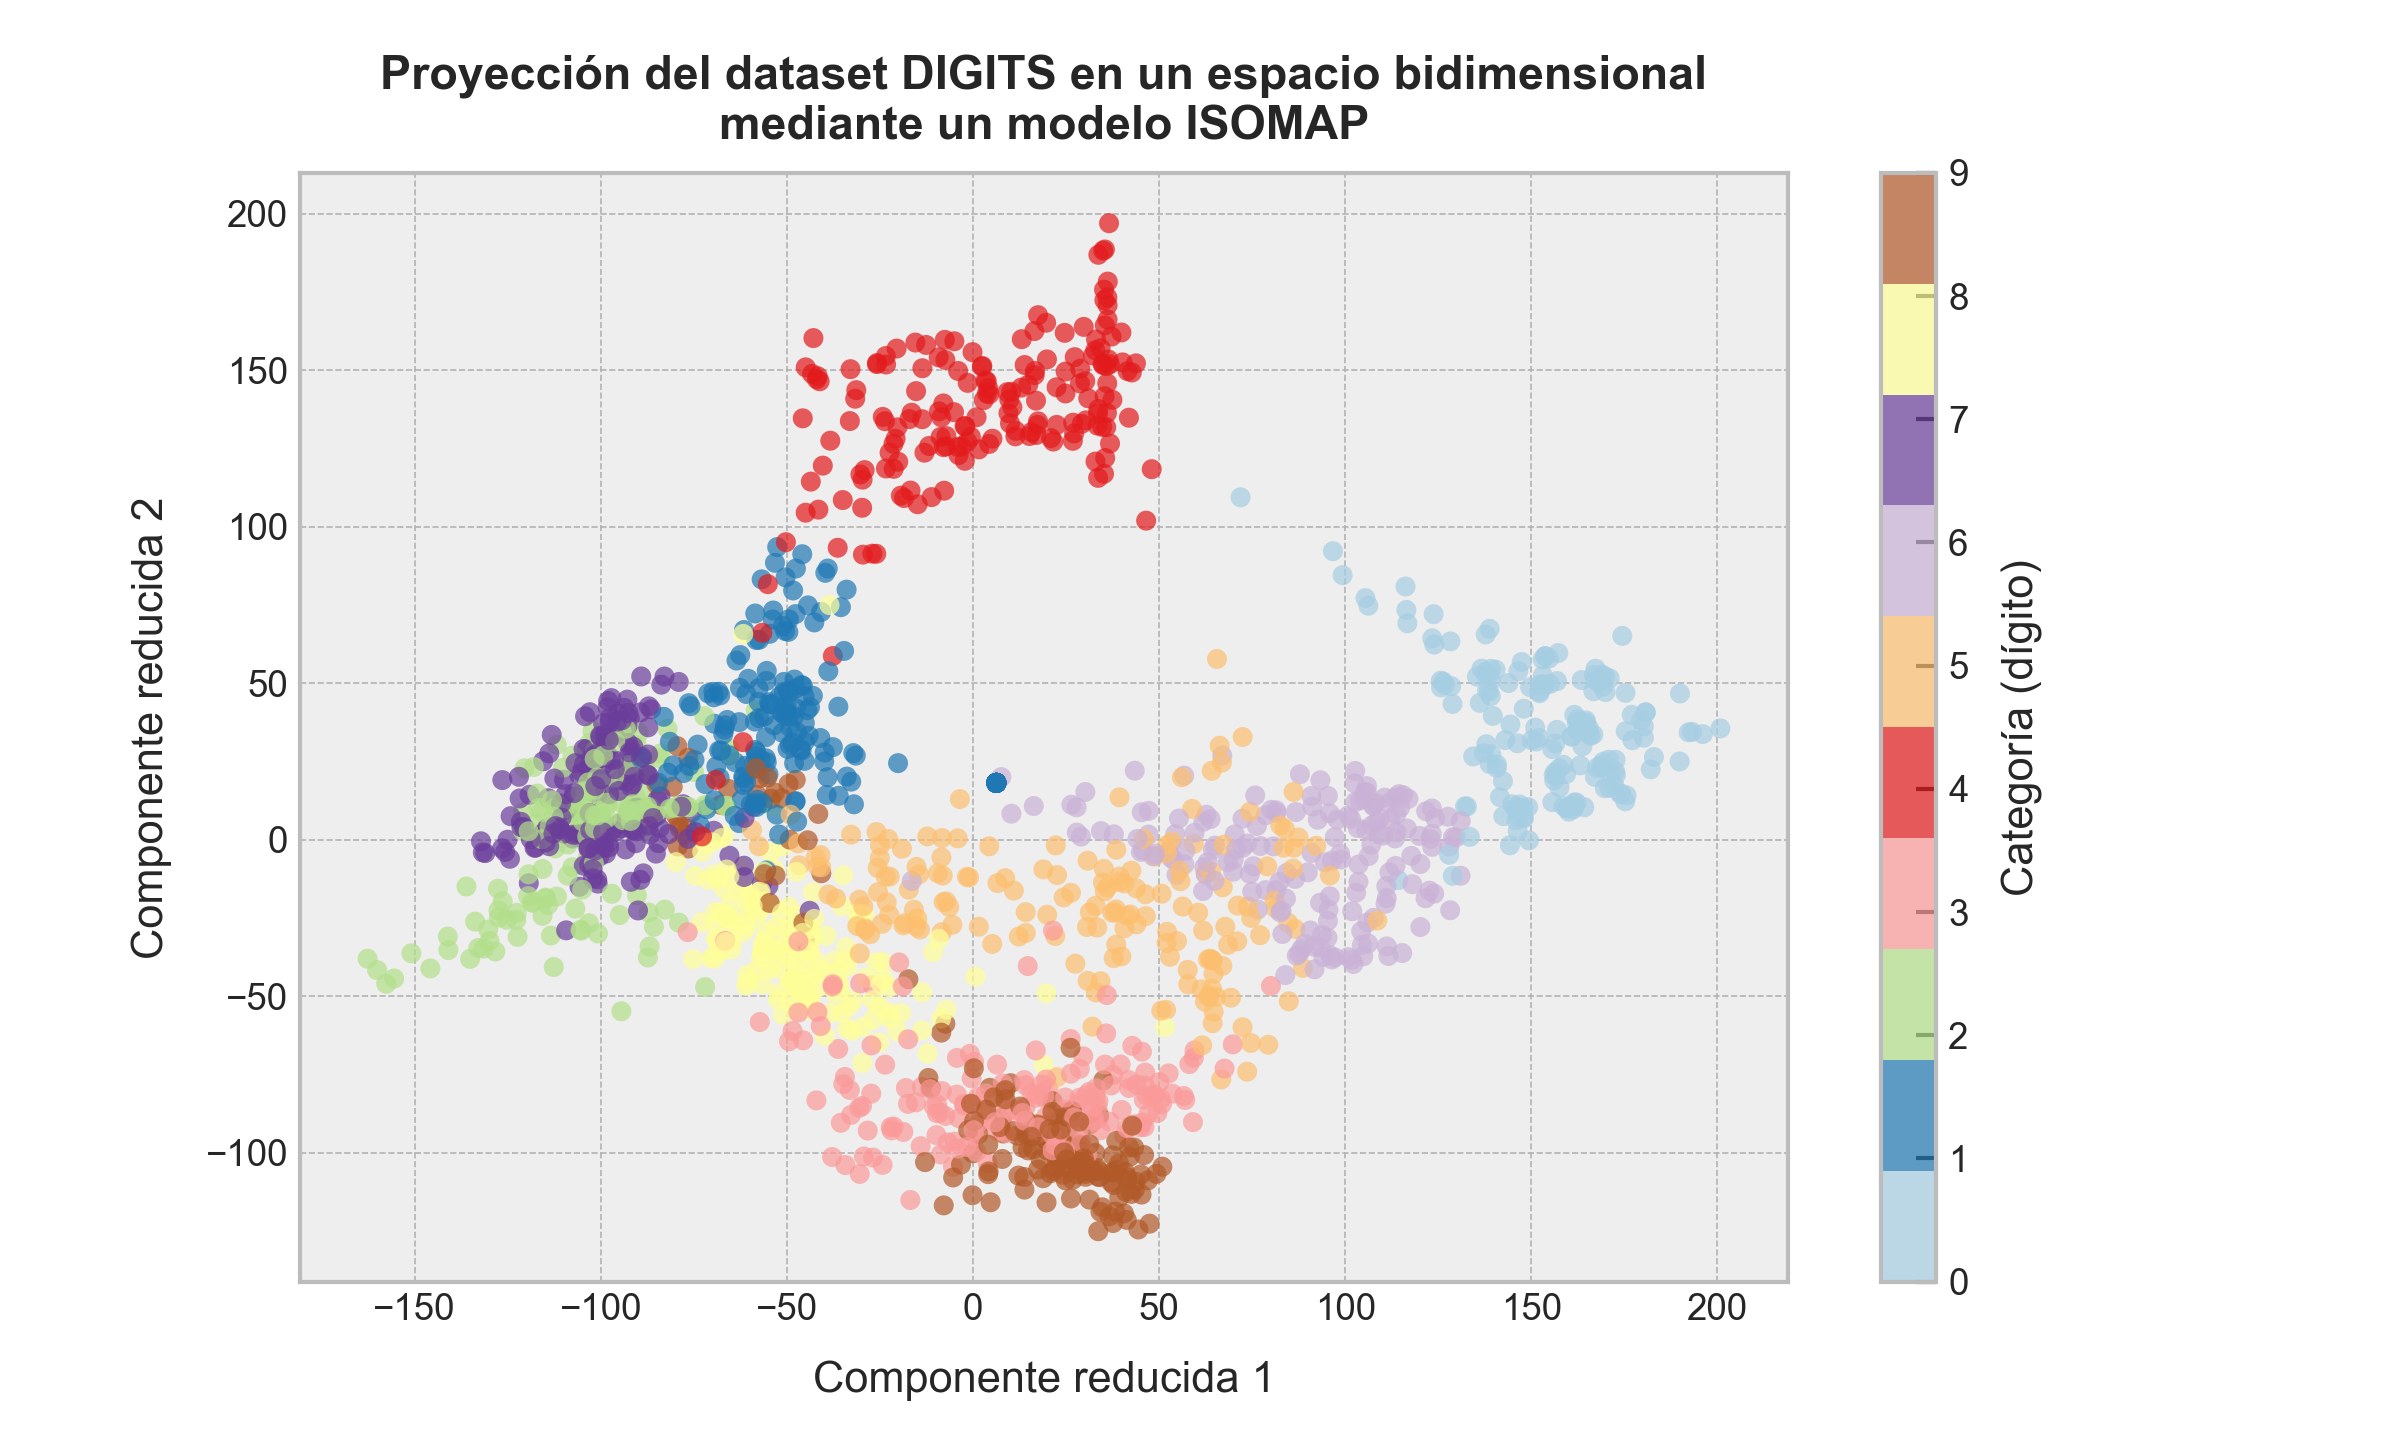

In [62]:
# Graficamos los resultados.
fig, ax = plt.subplots(figsize=(10, 6))
p = ax.scatter(
    x=X_2D[:, 0], y=X_2D[:, 1], c=y, edgecolor='none',
    alpha=0.7, cmap=plt.cm.get_cmap('Paired', 10)
)
cb = fig.colorbar(p)
cb.set_label(label='Categoría (dígito)', fontsize=13, labelpad=10)
ax.set_xlabel("Componente reducida 1", fontsize=13, labelpad=10)
ax.set_ylabel("Componente reducida 2", fontsize=13, labelpad=10)
ax.set_title(
    "Proyección del dataset DIGITS en un espacio bidimensional"
    + "\nmediante un modelo ISOMAP", fontsize=14, fontweight="bold",
    pad=10
);

Este gráfico nos entrega una buena idea respecto a qué tan separados están estos números en un espacio de 64 dimensiones. Por ejemplo, los ceros (en celeste) y unos (en azul) presentan una superposición mínima en esta representación, lo que es algo razonable, ya que los ceros tienen tinta en forma de corona en la parte central de la imagen, mientras que los unos representan en general un único filamento en la zona central. En cualquier caso, los dígitos parecen estar bien diferenciados en el dominio de atributos bidimensional que hemos construido, lo que implica que un modelo de clasificación no debiera tener mayores problemas a la hora de ajustarse a este conjunto de datos.

Intentemos pues ajustar un modelo de clasificación a estos datos. Para ello, seguiremos la receta y separaremos nuestro dataset en un conjunto de entrenamiento y un conjunto de prueba, donde el último constará de un 20% del total de los datos:

In [63]:
# Creamos nuestros conjuntos de entrenamiento y de prueba (ya formateados como pares (X, y)).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Ahora implementaremos un modelo de clasificación de tipo lineal generalizado, conocido como **máquina de vectores de soporte** (SVM). Este modelo puede implementarse usando la clase `SVC()`, provista por el módulo `sklearn.svm`:

In [64]:
from sklearn.svm import SVC

In [65]:
# Instanciamos nuestro modelo.
model = SVC(random_state=7)

In [66]:
# Ajustamos nuestro modelo a los datos de entrenamiento.
model.fit(X_train, y_train)

SVC(random_state=7)

In [67]:
# Y obtenemos predicciones para los datos de prueba.
y_test_pred = model.predict(X_test)

In [68]:
# Por supuesto, también calcularemos la exactitud de nuestro modelo.
print(f"Exactitud del modelo en datos de prueba = {100 * round(accuracy_score(y_test, y_test_pred), 2)}%")

Exactitud del modelo en datos de prueba = 99.0%


Incluso con este modelo sencillo (o bueno, no *tanto* en verdad...), tenemos un 99% de exactitud sobre los datos de prueba. Sin embargo, este único KPI no nos dice dónde se ha equivocado nuestro modelo. Una forma adecuada de averiguar dónde están los mayores errores que ha cometido nuestro modelo guarda relación con la construcción de una estructura conocida como **matriz de confusión**, la cual permite ordenar las predicciones hechas por el modelo en términos de sus *aciertos* en cada una de las categorías representadas por la variable de respuesta (`y_test`) y las predicciones efectuadas (`y_test_pred`). Dicha matriz puede calcularse fácilmente haciendo uso de la función `confusion_matrix()`, la cual *vive* en el módulo `sklearn.metrics`:

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
# Construimos la matriz de confusión de nuestro modelo sobre los datos de prueba.
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

In [71]:
# Mostramos esta matriz en pantalla.
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]])

La matriz de confusión es un concepto que estudiaremos en detalle más adelante. Sin embargo, su estructura es sencilla: Se trata de una matriz cuadrada cuya diagonal principal muestra los *aciertos* del modelo en cada categoría (diez en nuestro caso, ordenadas desde el dígito 0 hasta el dígito 9).  Cualquier valor distinto de cero fuera de la diagonal principal implica que el modelo ha cometido un error clasificando una determinada instancia. En la matriz de confusión anterior, podemos observar que el valor en la posición `(8, 1)` es igual a `2`, lo que significa que nuestro modelo ha confundido en dos oportunidades un valor que es igual a `8`, etiquetándolo incorrectamente como un 1`.

Esta matriz puede graficarse para su mejor comprensión, haciendo uso de un sencillo mapa de calor:

<IPython.core.display.Javascript object>


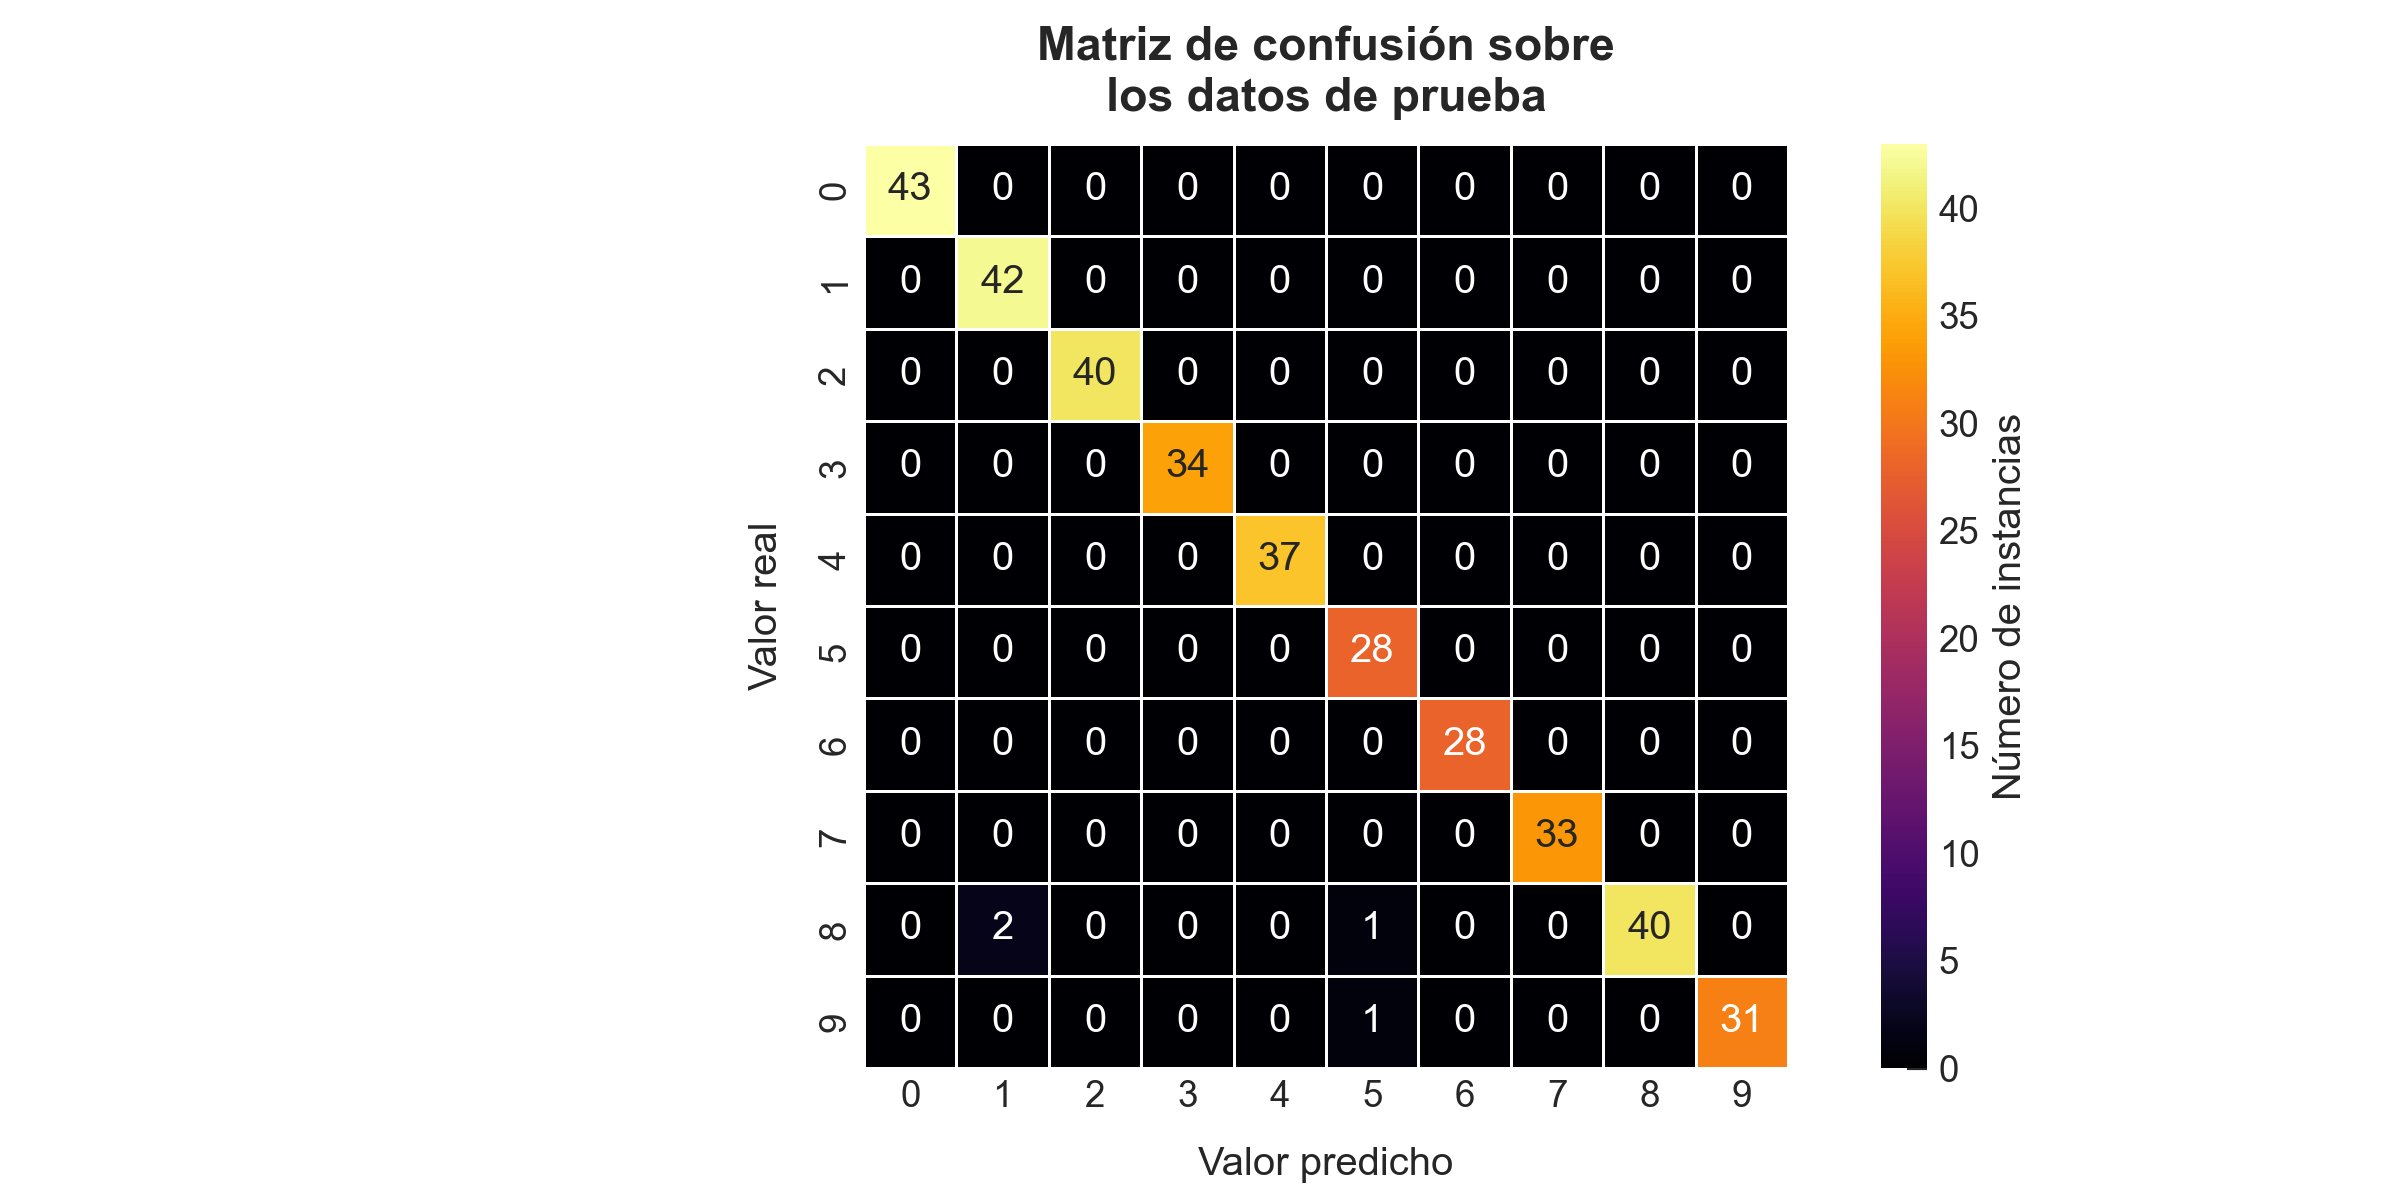

In [72]:
# Graficamos la matriz de confusión.
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.heatmap(
    cm, square=True, annot=True, cbar=True, cmap="inferno", ec="k", 
    lw=0.8, ax=ax, cbar_kws=dict(label="Número de instancias")
)
p.figure.axes[-1].yaxis.label.set_fontsize(12)
ax.set_xlabel('Valor predicho', fontsize=12, labelpad=10)
ax.set_ylabel('Valor real', fontsize=12, labelpad=10)
ax.set_title(
    "Matriz de confusión sobre\nlos datos de prueba", 
    fontsize=14, fontweight="bold", pad=10
);

Otra forma de verificar dónde pueden estar acumulados los errores que comete nuestro modelo, es graficar los dígitos de entrada nuevamente, junto con sus categorías predichas, aunque esto puede resultar problemático para un conjunto tan grande de imágenes. Por lo tanto, ejemplificaremos esto para las primeras 100 imágenes del conjunto de prueba. Usaremos el color rojo para las clasificaciones incorrectas, y el verde para las correctas, con lo cual:

<IPython.core.display.Javascript object>


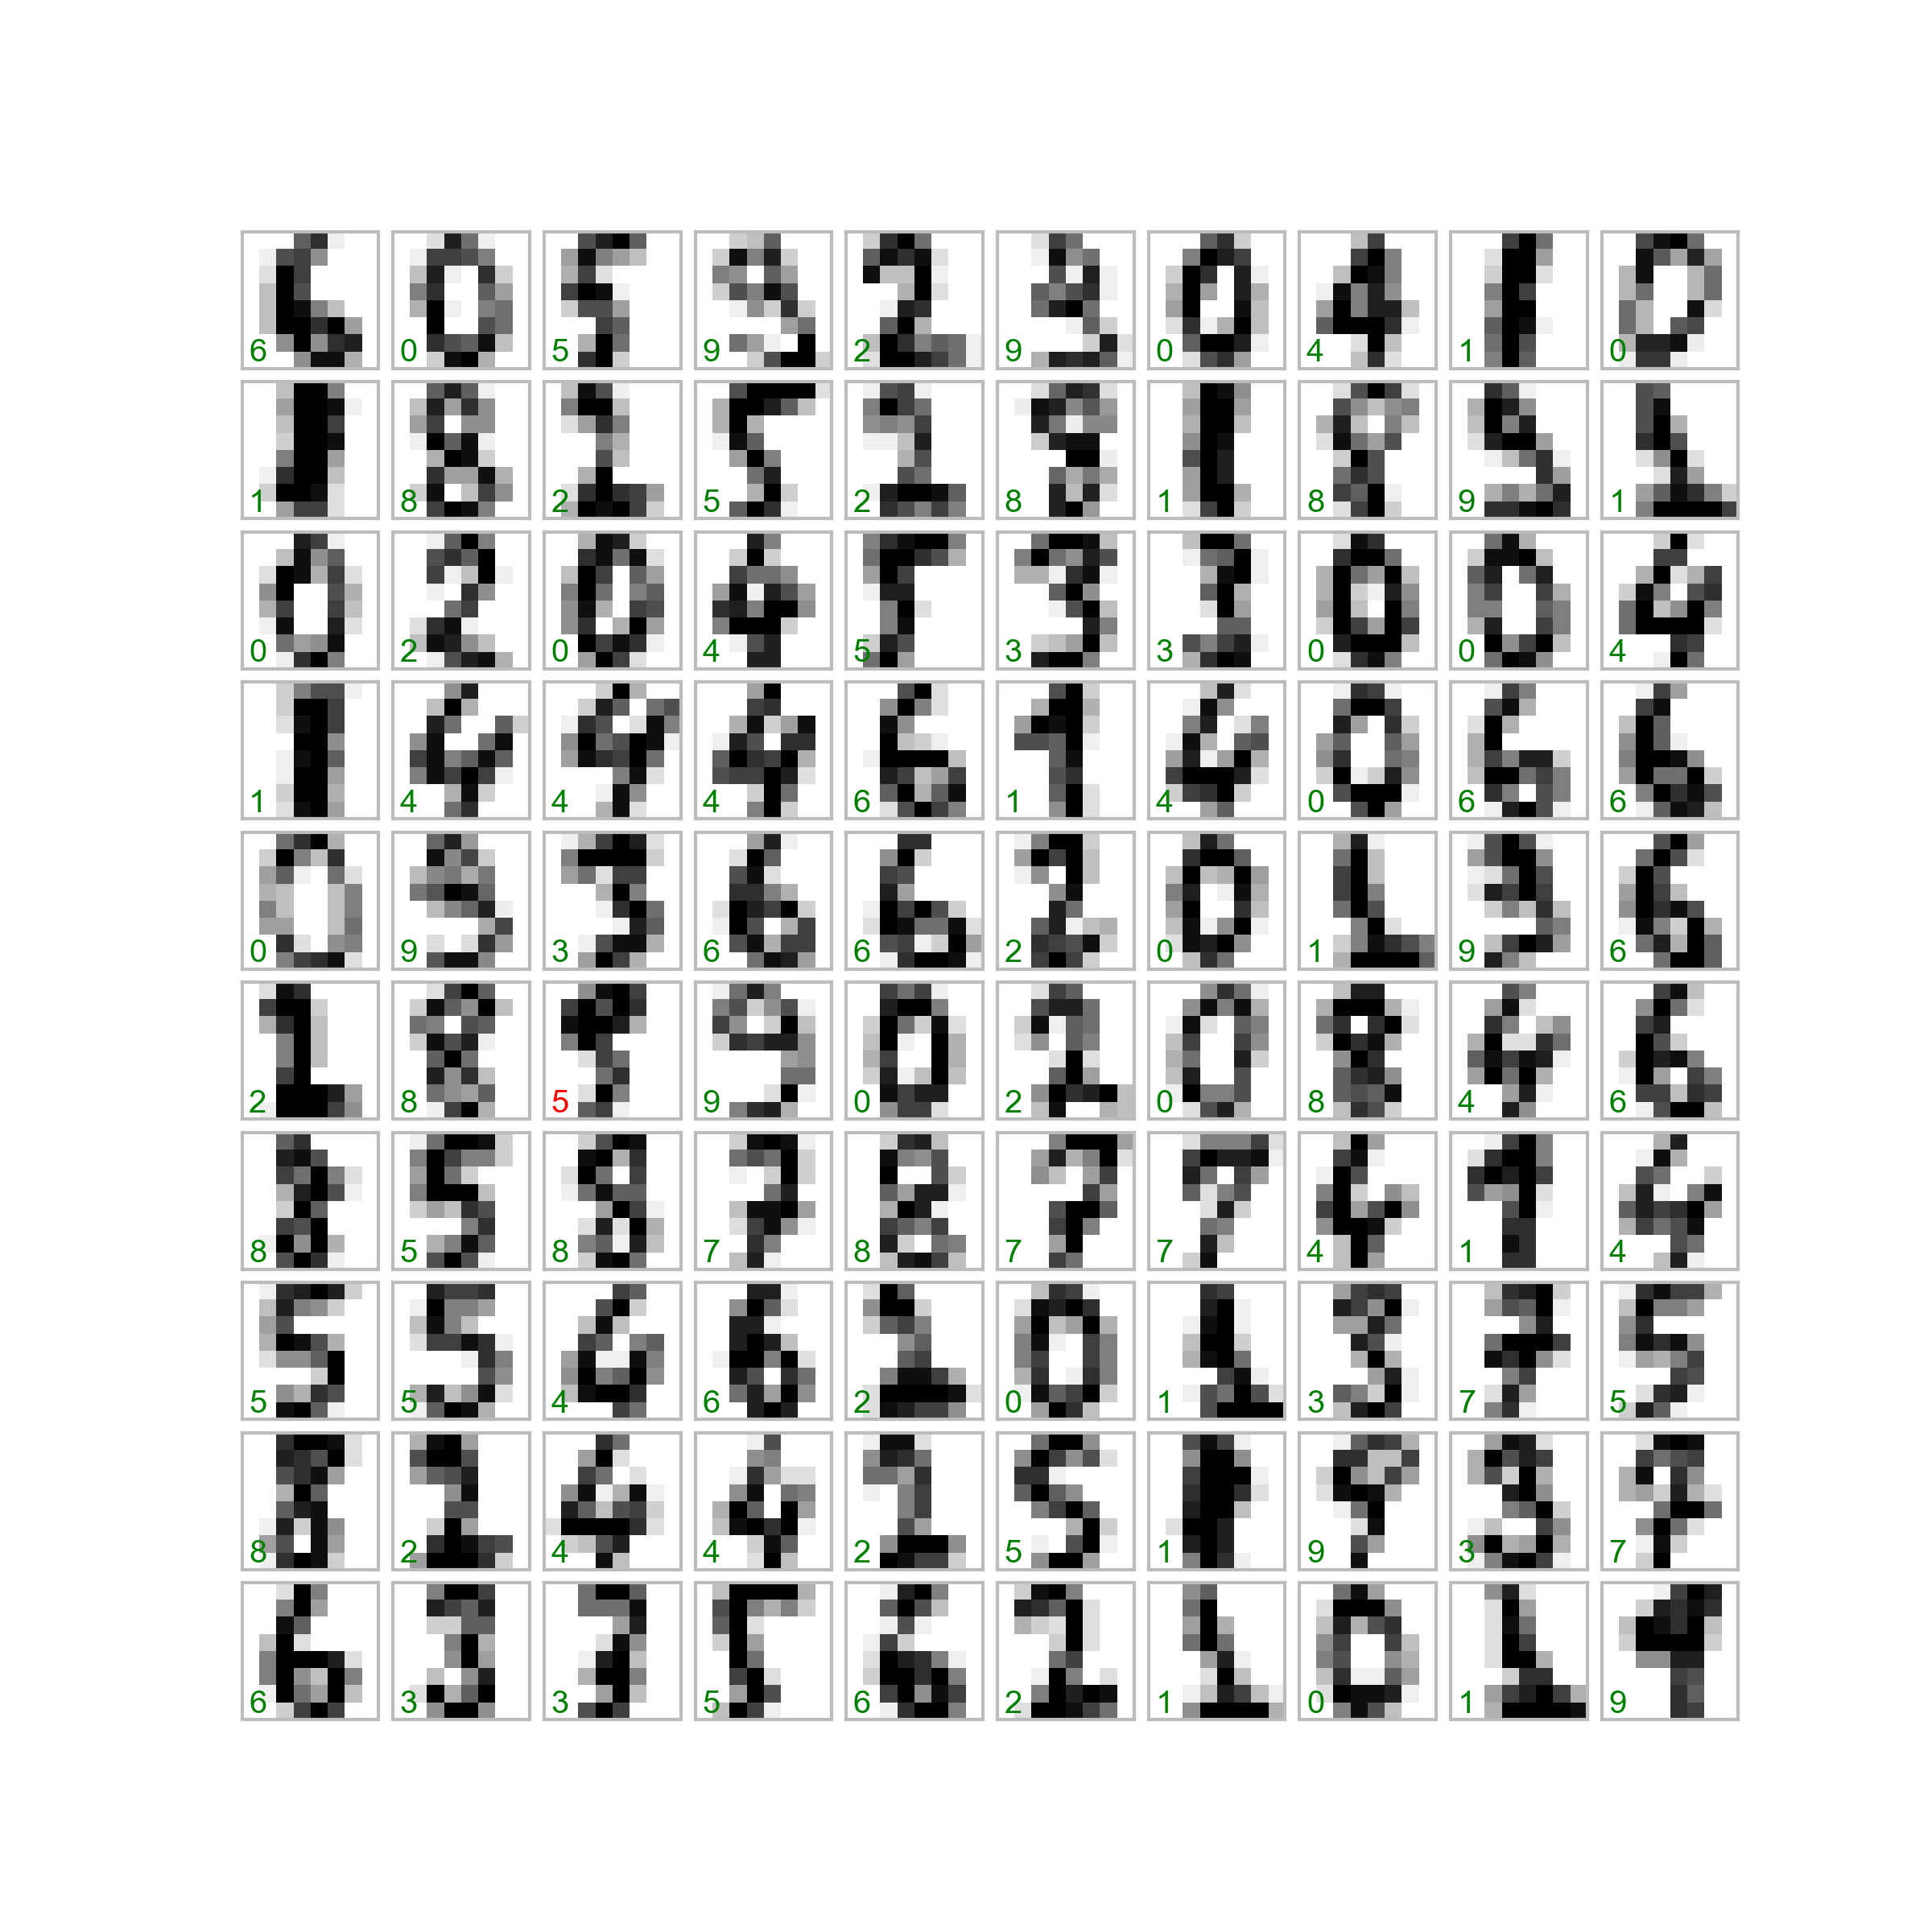

In [73]:
# Graficamos las primeras 100 imágenes del conjunto de prueba y las categorías 
# predichas para cada una.
fig, axes = plt.subplots(
    nrows=10, ncols=10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)
)
test_images = X_test.values.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        test_images[i], cmap='binary', interpolation='nearest'
    )
    ax.text(
        0.05, 0.05, str(y_test_pred[i]), transform=ax.transAxes,
        color='green' if (y_test.values[i] == y_test_pred[i]) else 'red'
    );

La examinación de este gráfico nos indica que el modelo se desempeña de manera sorprendente, incluso con lo rápido que lo construimos. Esto, por supuesto, es algo esperable, ya que este dataset no es difícil de aprender por algoritmos de aprendizaje sencillos. No será el caso, en general, cuando nos veamos enfrentados a conjuntos de datos del mundo real. Pero es una primera aproximación razonable para ir examinando lo que seremos capaces de hacer una vez entremos en detalle en todo lo que respecta a la implementación de modelos de machine learning en **<font color='mediumorchid'>Scikit-Learn</font>**. ◼︎